In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('anfis.csv')

In [3]:
# Sepsis is the target variable, so we don't need sirs and qsofa variables.
df = df.drop(columns=['sirs', 'qsofa'])

In [4]:
df.shape

(36000, 26)

In [5]:
df.head()

heart_rate  bp_systolic  bp_diastolic   map  resp       temp   spo2  fio2  \
0        81.0         91.0          45.0  57.0  20.0        NaN   97.0   NaN   
1        80.0         87.0          49.0  58.0  21.0        NaN  100.0   NaN   
2        80.0         80.0          37.0  48.0  16.0  36.666667   99.0   NaN   
3        80.0         81.0          34.0  45.0  17.0  36.666667   96.0   NaN   
4        80.0         86.0          37.0  49.0  17.0  36.666667   97.0   NaN   

   wbc  bun  ...  po2  bicarbonate  hemoglobin  hematocrit  potassium  \
0  NaN  NaN  ...  NaN          NaN         NaN         NaN        NaN   
1  NaN  NaN  ...  NaN          NaN         NaN         NaN        NaN   
2  NaN  NaN  ...  NaN          NaN         NaN         NaN        NaN   
3  NaN  NaN  ...  NaN          NaN         NaN         NaN        NaN   
4  NaN  NaN  ...  NaN          NaN         NaN         NaN        NaN   

   chloride   gcs    age  sepsis_icd  patient_id  
0       NaN  15.0  88.64         1.0         951  
1       NaN  15.0  88.64         1.0         951  
2       NaN  15.0  88.64         1.0         951  
3       NaN  15.0  88.64         1.0         951  
4       NaN  15.0  88.64         1.0         951  

[5 rows x 26 columns]

In [6]:
df.nunique()

heart_rate       150
bp_systolic      182
bp_diastolic     135
map              344
resp              64
temp             346
spo2              61
fio2              22
wbc              388
bun              144
bilirubin        138
creatinine       104
lactate          158
platelets        517
ph                77
pco2              94
po2              427
bicarbonate       40
hemoglobin       119
hematocrit       292
potassium         61
chloride          56
gcs               13
age             1253
sepsis_icd         2
patient_id      1500
dtype: int64

In [7]:
df.isna().sum()

heart_rate       1669
bp_systolic      1706
bp_diastolic     1707
map              1752
resp             1592
temp             2567
spo2             1815
fio2            28206
wbc              8655
bun              7979
bilirubin       23918
creatinine       7931
lactate         18446
platelets        8256
ph              16046
pco2            16835
po2             16829
bicarbonate      7960
hemoglobin       7876
hematocrit       7607
potassium        6701
chloride         7450
gcs              2918
age               899
sepsis_icd          0
patient_id          0
dtype: int64

In [8]:
df['sepsis_icd'].value_counts()

sepsis_icd
1.0    18000
0.0    18000
Name: count, dtype: int64

In [9]:
# avg rows per patient
df.groupby('patient_id').size().mean()

24.0

In [10]:
df.groupby('patient_id').size().unique()

array([24])

In [11]:
df.age.describe()

count    35101.000000
mean        65.244995
std         17.197759
min         18.680000
25%         54.110000
50%         66.220000
75%         79.080000
max         91.400000
Name: age, dtype: float64

In [12]:
df.age.unique()

array([88.64,   nan, 91.4 , ..., 59.28, 75.1 , 55.77])

<Axes: >

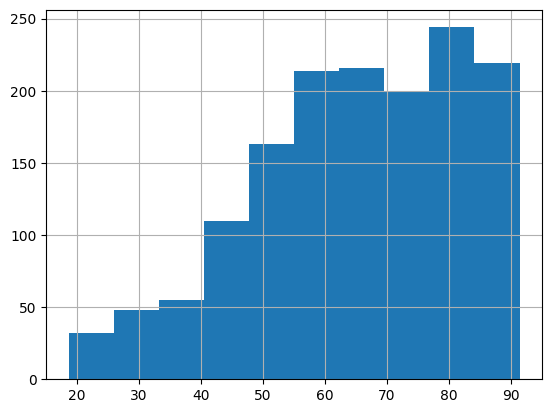

In [13]:
# graph age distribution
import matplotlib.pyplot as plt
df.groupby('patient_id').age.first().hist()


In [14]:
df[df['age'].isna()]

heart_rate  bp_systolic  bp_diastolic  map  resp  temp  spo2  fio2  \
24            NaN          NaN           NaN  NaN   NaN   NaN   NaN   NaN   
25            NaN          NaN           NaN  NaN   NaN   NaN   NaN   NaN   
120           NaN          NaN           NaN  NaN   NaN   NaN   NaN   NaN   
121           NaN          NaN           NaN  NaN   NaN   NaN   NaN   NaN   
192           NaN          NaN           NaN  NaN   NaN   NaN   NaN   NaN   
...           ...          ...           ...  ...   ...   ...   ...   ...   
35808         NaN          NaN           NaN  NaN   NaN   NaN   NaN   NaN   
35904         NaN          NaN           NaN  NaN   NaN   NaN   NaN   NaN   
35928         NaN          NaN           NaN  NaN   NaN   NaN   NaN   NaN   
35952         NaN          NaN           NaN  NaN   NaN   NaN   NaN   NaN   
35953         NaN          NaN           NaN  NaN   NaN   NaN   NaN   NaN   

       wbc  bun  ...  po2  bicarbonate  hemoglobin  hematocrit  potassium  \
24     NaN  NaN  ...  NaN          NaN         NaN         NaN        NaN   
25     NaN  NaN  ...  NaN          NaN         NaN         NaN        NaN   
120    NaN  NaN  ...  NaN          NaN         NaN         NaN        NaN   
121    NaN  NaN  ...  NaN          NaN         NaN         NaN        NaN   
192    NaN  NaN  ...  NaN          NaN         NaN         NaN        NaN   
...    ...  ...  ...  ...          ...         ...         ...        ...   
35808  NaN  NaN  ...  NaN          NaN         NaN         NaN        NaN   
35904  NaN  NaN  ...  NaN          NaN         NaN         NaN        NaN   
35928  NaN  NaN  ...  NaN          NaN         NaN         NaN        NaN   
35952  NaN  NaN  ...  NaN          NaN         NaN         NaN        NaN   
35953  NaN  NaN  ...  NaN          NaN         NaN         NaN        NaN   

       chloride  gcs  age  sepsis_icd  patient_id  
24          NaN  NaN  NaN         1.0         781  
25          NaN  NaN  NaN         1.0         781  
120         NaN  NaN  NaN         1.0        7421  
121         NaN  NaN  NaN         1.0        7421  
192         NaN  NaN  NaN         1.0        1901  
...         ...  ...  ...         ...         ...  
35808       NaN  NaN  NaN         0.0        6200  
35904       NaN  NaN  NaN         0.0        4870  
35928       NaN  NaN  NaN         0.0        1450  
35952       NaN  NaN  NaN         0.0        1050  
35953       NaN  NaN  NaN         0.0        1050  

[899 rows x 26 columns]

In [15]:
df[df['age'].isna()].patient_id.nunique()

619

In [16]:
df[df['age'].isna()].patient_id.value_counts()

patient_id
3261    6
3420    6
1560    5
5711    5
7481    5
       ..
5610    1
8580    1
8540    1
2061    1
380     1
Name: count, Length: 619, dtype: int64

In [17]:
df[df['age'].isna()].isna().sum()

heart_rate      899
bp_systolic     899
bp_diastolic    899
map             899
resp            899
temp            899
spo2            899
fio2            899
wbc             899
bun             899
bilirubin       899
creatinine      899
lactate         899
platelets       899
ph              899
pco2            899
po2             899
bicarbonate     899
hemoglobin      899
hematocrit      899
potassium       899
chloride        899
gcs             899
age             899
sepsis_icd        0
patient_id        0
dtype: int64

In [18]:
# Drop rows with missing age
df = df.dropna(subset=['age'])

In [19]:
# check patients have at least one age value
grouped = df.groupby('patient_id')
i=0
for patient_id, group in grouped:
    if group['age'].nunique() == 1:
        continue
    else:
        i+=1
        print(f"Patient {patient_id} has varying ages.")

if i==0:
    print("All patients have consistent ages.")

All patients have consistent ages.


In [20]:
df[df.heart_rate.isna()].isna().sum()

heart_rate      770
bp_systolic     750
bp_diastolic    751
map             751
resp            654
temp            672
spo2            747
fio2            710
wbc             592
bun             638
bilirubin       724
creatinine      637
lactate         384
platelets       570
ph              357
pco2            362
po2             362
bicarbonate     643
hemoglobin      393
hematocrit      581
potassium       336
chloride        489
gcs             687
age               0
sepsis_icd        0
patient_id        0
dtype: int64

In [21]:
df[df.heart_rate.isna()]['patient_id'].nunique()

435

In [22]:
df[df.heart_rate.isna()]['patient_id'].value_counts().head(20)

patient_id
1011    11
4811     9
9040     9
321      8
10       7
9661     7
4941     7
8820     7
6130     7
1731     6
7980     6
7411     6
1800     5
5770     5
4010     5
2470     5
2921     5
1660     5
9750     5
5790     5
Name: count, dtype: int64

In [23]:
df[df.heart_rate.isna()]['patient_id'].value_counts().describe()

count    435.000000
mean       1.770115
std        1.416665
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: count, dtype: float64

In [24]:
na_counts = df.groupby('patient_id')['heart_rate'].apply(lambda x: x.isna().sum())
filtered_patient_ids = na_counts[na_counts == 1].index
filtered_df = df[df['patient_id'].isin(filtered_patient_ids)]
filtered_df

heart_rate  bp_systolic  bp_diastolic   map  resp       temp   spo2  \
242           NaN          NaN           NaN   NaN   NaN        NaN    NaN   
243          65.0         68.0          35.0  40.0  14.0  36.777778   97.0   
244          65.0         96.0          44.0  58.0  25.0  36.777778   98.0   
245          65.0        105.0          50.0  62.0  18.0  36.777778   97.0   
246          65.0        113.0          52.0  67.0  19.0  36.777778   96.0   
...           ...          ...           ...   ...   ...        ...    ...   
35971        95.0        112.0          45.0  64.0  19.0  38.000000   98.0   
35972        96.0        120.0          46.0  67.0  18.0  38.000000   97.0   
35973       100.0        129.0          54.0  77.0  19.0  38.000000  100.0   
35974        95.0        137.0          44.0  71.0  19.0  38.000000   99.0   
35975        95.0        134.0          43.0  70.0  19.0  38.166667   99.0   

       fio2   wbc   bun  ...   po2  bicarbonate  hemoglobin  hematocrit  \
242     NaN  13.3  22.0  ...   NaN         21.0        11.1        33.1   
243     NaN  13.3  22.0  ...   NaN         21.0        11.1        33.1   
244     NaN  13.3  22.0  ...   NaN         21.0        11.1        33.1   
245     NaN  13.3  22.0  ...   NaN         21.0        11.1        33.1   
246     NaN  13.3  22.0  ...   NaN         21.0        11.1        33.1   
...     ...   ...   ...  ...   ...          ...         ...         ...   
35971  40.0   9.0  21.0  ...  96.0         25.0         9.8        28.2   
35972  40.0   9.0  21.0  ...  96.0         25.0         9.8        28.2   
35973  40.0   9.0  21.0  ...  96.0         25.0         9.8        28.2   
35974  40.0   9.0  21.0  ...  96.0         25.0         9.8        28.2   
35975  40.0   9.0  21.0  ...  96.0         25.0         9.8        28.2   

       potassium  chloride   gcs   age  sepsis_icd  patient_id  
242          4.1     105.0   NaN  91.4         1.0         931  
243          4.1     105.0  15.0  91.4         1.0         931  
244          4.1     105.0  15.0  91.4         1.0         931  
245          4.1     105.0  15.0  91.4         1.0         931  
246          4.1     105.0  15.0  91.4         1.0         931  
...          ...       ...   ...   ...         ...         ...  
35971        4.7     108.0  10.0  75.1         0.0        1050  
35972        4.7     108.0  10.0  75.1         0.0        1050  
35973        4.7     108.0  10.0  75.1         0.0        1050  
35974        4.7     108.0  10.0  75.1         0.0        1050  
35975        4.7     108.0  10.0  75.1         0.0        1050  

[6452 rows x 26 columns]

In [25]:
# fill missing heart rate values with the before value or after value for patient_id is im filtered_df.patient_id.unique().tolist()

for patient_id in filtered_df.patient_id.unique().tolist():
    patient_df = df[df['patient_id'] == patient_id]
    patient_df.loc[:, 'heart_rate'] = patient_df['heart_rate'].ffill().bfill()
    df.loc[df['patient_id'] == patient_id, :] = patient_df

In [26]:
df[df.heart_rate.isna()].isna().sum()

heart_rate      493
bp_systolic     484
bp_diastolic    484
map             484
resp            458
temp            471
spo2            484
fio2            473
wbc             383
bun             411
bilirubin       469
creatinine      411
lactate         175
platelets       361
ph              144
pco2            148
po2             148
bicarbonate     417
hemoglobin      203
hematocrit      376
potassium       154
chloride        284
gcs             472
age               0
sepsis_icd        0
patient_id        0
dtype: int64

In [27]:
# All columns have missing values for rows with missing heart rate
(df[df.heart_rate.isna()].isna().sum().sum() / (df.columns.shape[0] - 3)) / 493

0.7396595819737191

In [28]:
df.corrwith(df.heart_rate)

heart_rate      1.000000
bp_systolic    -0.048019
bp_diastolic    0.182545
map             0.109470
resp            0.302554
temp            0.035284
spo2           -0.004916
fio2            0.055344
wbc             0.094041
bun            -0.034332
bilirubin      -0.001658
creatinine     -0.049781
lactate         0.201096
platelets      -0.006370
ph             -0.089189
pco2           -0.050961
po2            -0.046368
bicarbonate    -0.173737
hemoglobin      0.001672
hematocrit     -0.011667
potassium      -0.045725
chloride        0.012078
gcs            -0.053562
age            -0.186650
sepsis_icd      0.203822
patient_id      0.004921
dtype: float64

In [29]:
filtered_df = df[df.patient_id.isin(df[df.heart_rate.isna()].patient_id.unique().tolist())]
print(filtered_df.shape)
filtered_df.groupby('patient_id').heart_rate.describe().describe()

(3679, 26)


count        mean         std         min         25%         50%  \
count  158.000000  158.000000  158.000000  158.000000  158.000000  158.000000   
mean    20.164557   88.604692    8.464218   74.620253   82.884494   88.303797   
std      2.059190   15.172613    5.214355   15.972352   14.669111   15.319094   
min     10.000000   48.571429    0.789542    0.000000   39.500000   48.000000   
25%     19.000000   78.469079    5.367756   65.000000   73.312500   78.000000   
50%     21.000000   88.159091    7.411287   76.000000   84.000000   88.250000   
75%     22.000000  100.312325   10.385056   83.000000   92.000000   98.500000   
max     22.000000  136.428571   48.723951  107.000000  122.750000  140.000000   

              75%         max  
count  158.000000  158.000000  
mean    94.243671  103.955696  
std     16.585811   18.923024  
min     48.750000   56.000000  
25%     82.750000   91.250000  
50%     92.000000  101.000000  
75%    106.750000  115.000000  
max    155.000000  166.000000

In [30]:
df.heart_rate.corr(df.sepsis_icd)

0.2038224281259173

In [31]:
df.groupby('patient_id')['heart_rate'].ffill().bfill().corr(df.sepsis_icd)

0.20737382740082214

In [32]:
# Fill missing heart rate values with the previous non-missing value
df['heart_rate'] = df.groupby('patient_id')['heart_rate'].ffill().bfill()

In [33]:
df.fio2.isna().sum() / df.shape[0]

0.77795504401584

In [34]:
# nan fio2 values for sepsis_icd
df[df.fio2.isna()].groupby('sepsis_icd').size().sort_values(ascending=False)

sepsis_icd
0.0    14100
1.0    13207
dtype: int64

In [35]:
# all values are nan fio2 values for sepsis_icd
df[df.fio2.isna()].groupby('sepsis_icd').size().sort_values(ascending=False) / df[df.fio2.isna()].shape[0]

sepsis_icd
0.0    0.516351
1.0    0.483649
dtype: float64

In [36]:
df.fio2.corr(df.sepsis_icd)

0.10528230846397481

In [37]:
# nan fio2 values for each patient
df[df.fio2.isna()].groupby('patient_id').size().sort_values(ascending=False).describe()

count    1355.000000
mean       20.152768
std         7.475286
min         1.000000
25%        22.000000
50%        23.000000
75%        24.000000
max        24.000000
dtype: float64

In [38]:
# unique fio2 values for each patient without nan fio2 values
df[df.fio2.notna()].groupby('patient_id')['fio2'].nunique().sort_values(ascending=False).describe()

count    378.000000
mean       2.375661
std        1.088469
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: fio2, dtype: float64

In [39]:
df = df.drop(columns=['fio2'])

In [40]:
df.bilirubin.describe()

count    12082.000000
mean         2.335234
std          4.695339
min          0.100000
25%          0.400000
50%          0.800000
75%          2.000000
max         50.000000
Name: bilirubin, dtype: float64

In [41]:
df.bilirubin.isna().sum() / df.shape[0]

0.6557932822426712

In [42]:
df.bilirubin.corr(df.sepsis_icd)

0.1052885574955712

In [43]:
# all values are nan bilirubin values for sepsis_icd
df[df.bilirubin.isna()].groupby('sepsis_icd').size().sort_values(ascending=False) / df[df.bilirubin.isna()].shape[0]

sepsis_icd
0.0    0.593119
1.0    0.406881
dtype: float64

In [44]:
# nan bilirubin values for each patient
df[df.bilirubin.isna()].groupby('patient_id').size().sort_values(ascending=False).describe()

count    1411.000000
mean       16.313962
std         8.996844
min         1.000000
25%         7.000000
50%        22.000000
75%        24.000000
max        24.000000
dtype: float64

In [45]:
# unique bilirubin values for each patient without nan fio2 values
df[df.bilirubin.notna()].groupby('patient_id')['bilirubin'].nunique().sort_values(ascending=False).describe()

count    685.000000
mean       1.367883
std        0.685366
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        7.000000
Name: bilirubin, dtype: float64

In [46]:
# drop bilirubin column
df = df.drop(columns=['bilirubin'])

In [47]:
df.shape

(35101, 24)

In [48]:
# Correlation between age and sepsis_icd
df['age'].corr(df['sepsis_icd'])

0.04691541349549085

In [49]:
df.age.describe()

count    35101.000000
mean        65.244995
std         17.197759
min         18.680000
25%         54.110000
50%         66.220000
75%         79.080000
max         91.400000
Name: age, dtype: float64

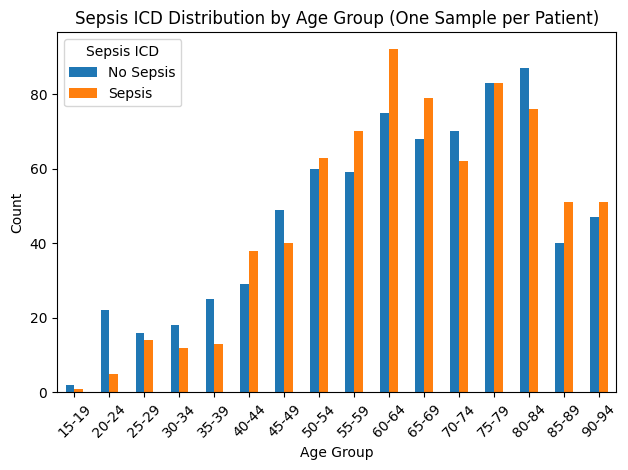

In [50]:
unique_patients = df.drop_duplicates(subset=['patient_id'])

bins = range(15, 96, 5)
labels = [f"{i}-{i+4}" for i in bins[:-1]] 

unique_patients = unique_patients.copy()  # Ensure you're working with a copy
unique_patients.loc[:, 'age_group'] = pd.cut(unique_patients['age'], bins=bins, labels=labels, right=False)

grouped = unique_patients.groupby(['age_group', 'sepsis_icd'], observed=False).size().unstack(fill_value=0)
grouped.plot(kind='bar', stacked=False)
plt.title('Sepsis ICD Distribution by Age Group (One Sample per Patient)')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sepsis ICD', labels=['No Sepsis', 'Sepsis'])
plt.tight_layout()
plt.show()

In [51]:
#df = df.drop(columns=['age'])

In [52]:
df.isna().sum()

heart_rate          0
bp_systolic       807
bp_diastolic      808
map               853
resp              693
temp             1668
spo2              916
wbc              7756
bun              7080
creatinine       7032
lactate         17547
platelets        7357
ph              15147
pco2            15936
po2             15930
bicarbonate      7061
hemoglobin       6977
hematocrit       6708
potassium        5802
chloride         6551
gcs              2019
age                 0
sepsis_icd          0
patient_id          0
dtype: int64

In [53]:
# Patients with missing temp values
df[df.temp.isna()]['patient_id'].nunique()

723

In [54]:
# filter patients with have missing temp values
missing_temp = df[df.temp.isna()].groupby('patient_id').size().sort_values(ascending=False)

In [55]:
missing_temp.describe()

count    723.000000
mean       2.307054
std        2.252679
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       23.000000
dtype: float64

In [56]:
# Missing temp values for patients with more than 3 missing temp values
missing_temp[missing_temp > 3]

patient_id
8210    23
60      22
9310    21
7950    20
6330    19
        ..
750      4
1191     4
271      4
260      4
600      4
Length: 125, dtype: int64

In [57]:
# The patient who has the most missing temp values
df[df['patient_id'] == 8210]['temp']

25296          NaN
25297          NaN
25298          NaN
25299          NaN
25300          NaN
25301          NaN
25302          NaN
25303          NaN
25304          NaN
25305          NaN
25306          NaN
25307          NaN
25308          NaN
25309          NaN
25310          NaN
25311          NaN
25312          NaN
25313          NaN
25314          NaN
25315          NaN
25316          NaN
25317          NaN
25318          NaN
25319    36.944444
Name: temp, dtype: float64

In [58]:
# The patient who has the second most missing temp values
df[df['patient_id'] == 60]['temp']

27720          NaN
27721          NaN
27722          NaN
27723          NaN
27724          NaN
27725          NaN
27726          NaN
27727          NaN
27728          NaN
27729          NaN
27730          NaN
27731          NaN
27732          NaN
27733          NaN
27734          NaN
27735          NaN
27736          NaN
27737          NaN
27738          NaN
27739          NaN
27740          NaN
27741          NaN
27742    36.777778
27743    36.777778
Name: temp, dtype: float64

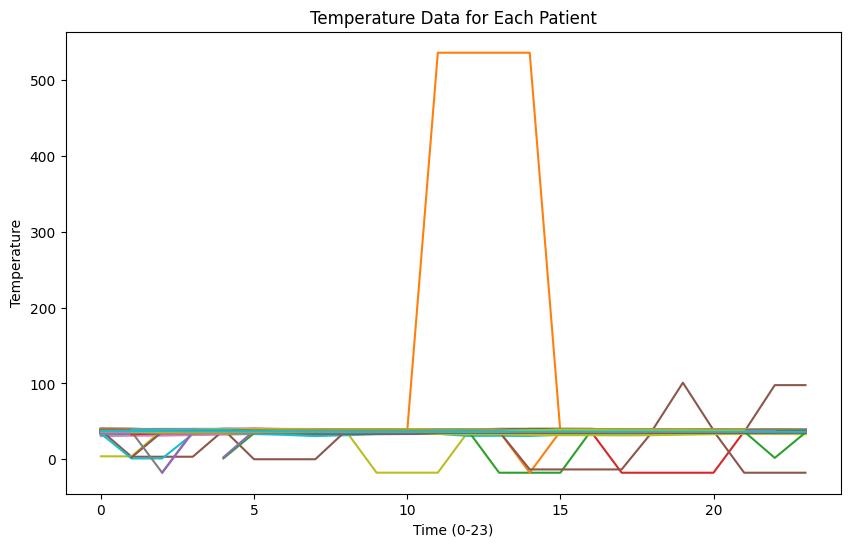

In [59]:
plt.figure(figsize=(10, 6))

# Loop over each unique patient and plot their data
for patient_id in df['patient_id'].unique():
    # Filter data for each patient
    patient_data = df[df['patient_id'] == patient_id]
    
    # Plot the data for each patient, using the row index as the x-axis (0-23)
    plt.plot(range(len(patient_data)), patient_data['temp'], label=f'Patient {patient_id}')

# Add labels and title
plt.xlabel('Time (0-23)')
plt.ylabel('Temperature')
plt.title('Temperature Data for Each Patient')

# Show the plot
plt.show()

Some patients have wrong temp values

In [60]:
df[df.temp>60][['temp', 'patient_id']]

temp  patient_id
517    536.388889        5611
518    536.388889        5611
519    536.388889        5611
520    536.388889        5611
11420  101.000000        1531
15742   97.800000        1391
15743   97.800000        1391

In [61]:
df[df.patient_id == 5611]

heart_rate  bp_systolic  bp_diastolic   map  resp        temp  spo2  \
506        81.0        110.0          67.0  77.0   NaN   35.888889  92.0   
507        81.0        105.0          63.0  73.0  28.0   35.888889  93.0   
508        70.0        104.0          67.0  76.0  22.0   35.888889  96.0   
509        76.0        102.0          60.0  69.0  21.0   36.833333  95.0   
510        71.0        102.0          66.0  75.0  22.0   36.833333  93.0   
511        69.0        100.0          68.0  75.0  16.0   36.833333  93.0   
512        63.0         98.0          67.0  74.0  20.0   36.833333  93.0   
513        89.0        108.0          50.0  65.0  21.0   36.888889  93.0   
514        97.0        103.0          58.0  69.0  16.0   36.888889  92.0   
515        97.0         99.0          55.0  63.0  14.0   36.888889  90.0   
516        89.0        107.0          68.0  76.0  19.0   36.888889  86.0   
517        82.0         76.0          52.0  58.0  21.0  536.388889  87.0   
518        77.0         82.0          52.0  60.0  21.0  536.388889  92.0   
519        75.0         90.0          55.0  69.0  25.0  536.388889  84.0   
520        74.0         87.0          56.0  69.0  18.0  536.388889  92.0   
521        76.0         84.0          54.0  66.0  16.0   36.055556  90.0   
522        74.0         75.0          51.0  61.0  13.0   36.055556  94.0   
523        42.0         99.0          51.0  68.0  13.0   36.055556  94.0   
524        66.0         86.0          54.0  68.0  11.0   36.055556  96.0   
525        71.0         75.0          50.0  61.0  15.0   36.944444  97.0   
526        80.0         81.0          69.0  74.0  15.0   36.944444  98.0   
527        75.0         87.0          55.0  67.0  16.0   36.944444  97.0   

      wbc  bun  creatinine  ...    po2  bicarbonate  hemoglobin  hematocrit  \
506   NaN  NaN         NaN  ...    NaN          NaN         NaN         NaN   
507  18.4  9.0         0.6  ...    NaN         25.0        10.6        33.7   
508  18.4  9.0         0.6  ...   92.0         25.0        10.6        33.7   
509  18.4  9.0         0.6  ...   92.0         25.0        10.6        33.7   
510  18.4  9.0         0.6  ...   92.0         25.0        10.6        33.7   
511  18.4  9.0         0.6  ...   92.0         25.0        10.6        33.7   
512  18.4  9.0         0.6  ...   92.0         25.0        10.6        33.7   
513  18.4  9.0         0.6  ...   92.0         25.0        10.6        33.7   
514  18.4  9.0         0.6  ...   92.0         25.0        10.6        33.7   
515  18.4  9.0         0.6  ...   92.0         25.0        10.6        33.7   
516  18.4  9.0         0.6  ...   92.0         25.0        10.6        33.7   
517  18.4  9.0         0.6  ...  104.0         25.0        10.6        33.7   
518  18.4  9.0         0.6  ...  104.0         25.0        10.6        33.7   
519  18.4  8.0         0.4  ...   77.0         20.0        10.6        33.7   
520  18.4  8.0         0.4  ...   77.0         20.0        10.6        33.7   
521  18.4  8.0         0.4  ...   77.0         20.0        10.6        33.7   
522  18.4  8.0         0.4  ...   77.0         20.0        10.6        33.7   
523  18.4  8.0         0.4  ...   77.0         20.0        10.6        33.7   
524  18.4  8.0         0.5  ...   77.0         29.0        10.6        33.7   
525  18.4  8.0         0.5  ...   77.0         29.0        10.6        33.7   
526  18.4  8.0         0.5  ...   77.0         29.0        10.6        33.7   
527  18.4  8.0         0.5  ...   77.0         29.0        10.6        33.7   

     potassium  chloride   gcs    age  sepsis_icd  patient_id  
506        NaN       NaN  15.0  65.36         1.0        5611  
507        4.2     101.0  15.0  65.36         1.0        5611  
508        4.2     101.0  15.0  65.36         1.0        5611  
509        4.2     101.0  15.0  65.36         1.0        5611  
510        4.2     101.0  15.0  65.36         1.0        5611  
511        4.2     101.0  15.0  65.36         1.0     

In [62]:
df[df.patient_id == 1391]

heart_rate  bp_systolic  bp_diastolic   map  resp       temp   spo2  \
15720       111.0         92.0          43.0  52.0  25.0  36.777778   98.0   
15721        99.0        104.0          45.0  55.0  25.0  36.777778   97.0   
15722        89.0        104.0          45.0  55.0  23.0  36.555556  100.0   
15723        94.0        105.0          48.0  60.0  20.0  36.555556   97.0   
15724       102.0        119.0          41.0  60.0  26.0  36.555556   96.0   
15725        95.0         99.0          43.0  57.0  21.0  36.555556   98.0   
15726        87.0        113.0          49.0  64.0  21.0  36.388889   96.0   
15727        87.0        105.0          60.0  70.0  30.0  36.388889   96.0   
15728        80.0        105.0          52.0  65.0  24.0  36.388889   97.0   
15729        83.0        105.0          48.0  59.0  35.0  36.388889   96.0   
15730        88.0        114.0          51.0  65.0  32.0  36.388889   96.0   
15731        86.0         97.0          53.0  63.0  18.0  36.388889   97.0   
15732        84.0        109.0          53.0  66.0  18.0  36.388889   98.0   
15733        84.0        132.0          55.0  74.0  19.0  36.388889   92.0   
15734        75.0         91.0          54.0  64.0  18.0  36.388889   97.0   
15735        76.0        125.0          51.0  71.0  16.0  35.555556   99.0   
15736        78.0        109.0          49.0  64.0  25.0  35.555556   99.0   
15737        77.0        100.0          53.0  63.0  30.0  35.555556   99.0   
15738        76.0        104.0          54.0  65.0  53.0  34.777778   99.0   
15739        78.0         86.0          45.0  56.0  17.0  34.777778   99.0   
15740        78.0         82.0          51.0  59.0  30.0  34.777778   99.0   
15741        76.0        119.0          52.0  69.0  21.0  36.000000   99.0   
15742        81.0        103.0          56.0  68.0  60.0  97.800000   99.0   
15743        81.0        115.0          44.0  62.0  54.0  97.800000   99.0   

        wbc   bun  creatinine  ...   po2  bicarbonate  hemoglobin  hematocrit  \
15720  13.0  57.0         3.2  ...   NaN         19.0         8.6        25.5   
15721  13.0  57.0         3.2  ...  88.0         19.0         8.6        25.5   
15722  13.0  57.0         3.2  ...  88.0         19.0         8.6        25.5   
15723  13.0  57.0         3.2  ...  88.0         19.0         8.6        25.5   
15724  13.0  57.0         3.2  ...  88.0         19.0         8.6        25.5   
15725  16.6  56.0         3.2  ...  88.0         20.0         9.0        27.3   
15726  16.6  56.0         3.2  ...  88.0         20.0         9.0        27.3   
15727  16.6  56.0         3.2  ...  88.0         20.0         9.0        27.3   
15728  16.6  56.0         3.2  ...  88.0         20.0         9.0        27.3   
15729  16.6  56.0         3.2  ...  74.0         20.0         9.0        27.3   
15730  16.6  56.0         3.2  ...  74.0         20.0         9.0        27.3   
15731  16.6  56.0         3.2  ...  74.0         20.0         9.0        27.3   
15732  16.6  56.0         3.2  ...  74.0         20.0         9.0        27.3   
15733  16.6  56.0         3.2  ...  74.0         20.0         9.0        27.3   
15734  16.6  56.0         3.2  ...  74.0         20.0         9.0        27.3   
15735  16.4  58.0         3.3  ...  74.0         19.0         9.5        28.4   
15736  16.4  58.0         3.3  ...  74.0         19.0         9.5        28.4   
15737  16.4  58.0         3.3  ...  74.0         19.0         9.5        28.4   
15738  16.4  58.0         3.3  ...  74.0         19.0         9.5        28.4   
15739  16.4  58.0         3.3  ...  74.0         19.0         9.5        28.4   
15740  16.4  58.0         3.3  ...  74.0         19.0         9.5        28.4   
15741  16.4  58.0         3.3  ...  74.0         19.0         9.5        28.4   
15742  16.4  58.0         3.3  ...  44.0         19.0         9.5        28.4   
15743  16.4  58.0         3.3  ...  44.0         19.0         9.5        28.4   

       potassium  chloride  gc

In [63]:
df[df.temp<30][['temp', 'patient_id']]

temp  patient_id
1881  -17.722222        1141
1882  -17.722222        1141
1883  -17.722222        1141
8523    3.333333        6371
8524    3.333333        6371
8525    3.333333        6371
9072    3.888889         311
9073    3.777778         311
11406   0.000000        1531
11407   0.000000        1531
11408   0.000000        1531
18809 -17.777778        8020
18810 -17.777778        8020
18811 -17.777778        8020
18812 -17.777778        8020
18938   1.055556        5160
18939   1.055556        5160
19562   2.444445        6690
19981 -17.777778        1840
19982 -17.777778        1840
19983 -17.777778        1840
22372   1.111111        6190
25610 -17.777778        5120
25719 -17.777778        9770
27261 -17.777778        7860
27262 -17.777778        7860
27263 -17.777778        7860
28455 -13.444444        4540
28456 -13.444444        4540
28457 -13.444444        4540
28458 -13.444444        4540
31060   2.666666         850
32020 -17.777778        5410
34390   1.777778        3130

In [64]:
# if temp is greater than 60 or less than 30, change nan
df.loc[df.temp > 60, 'temp'] = np.nan
df.loc[df.temp < 30, 'temp'] = np.nan
df.temp.isna().sum()

1709

In [65]:
df[df.temp.isna()]['patient_id'].nunique()

734

In [66]:
print(df.temp.corr(df.sepsis_icd))
print(df.groupby('patient_id')['temp'].ffill().bfill().corr(df.sepsis_icd))

-0.007349141445026809
0.0042877624543331706


In [67]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
print(pd.DataFrame(imputer.fit_transform(df[['temp']]))[0].corr(df.sepsis_icd))

-0.0073189473490443855


In [68]:
df.temp = imputer.fit_transform(df[['temp']])

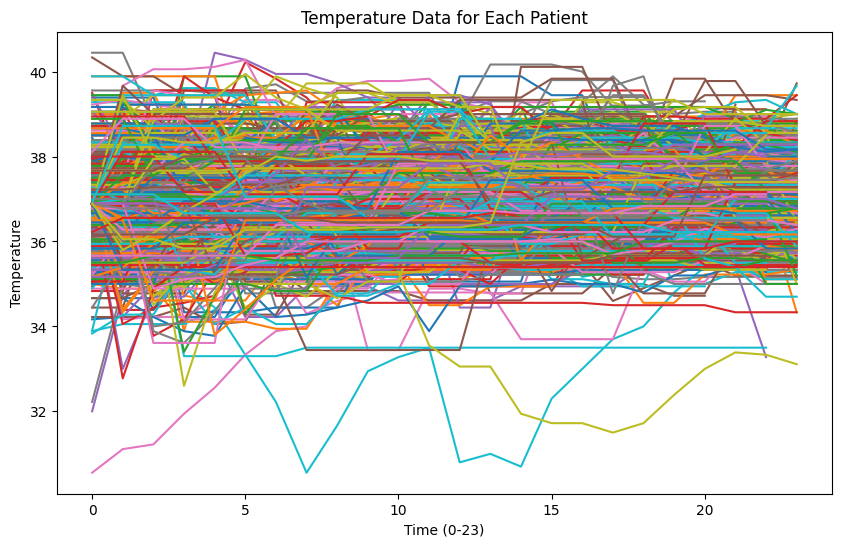

In [69]:
plt.figure(figsize=(10, 6))

# Loop over each unique patient and plot their data
for patient_id in df['patient_id'].unique():
    # Filter data for each patient
    patient_data = df[df['patient_id'] == patient_id]
    
    # Plot the data for each patient, using the row index as the x-axis (0-23)
    plt.plot(range(len(patient_data)), patient_data['temp'], label=f'Patient {patient_id}')

# Add labels and title
plt.xlabel('Time (0-23)')
plt.ylabel('Temperature')
plt.title('Temperature Data for Each Patient')

# Show the plot
plt.show()

In [70]:
df[df.temp<33][['temp', 'patient_id']]

temp  patient_id
1297   32.000000        1801
2862   32.222222        6521
2863   30.555556        6521
2864   31.666667        6521
2865   32.944446        6521
2868   30.799999        6521
2869   31.000000        6521
2870   30.700001        6521
2871   32.299999        6521
3504   30.555556        4681
3505   31.111111        4681
3506   31.222222        4681
3507   31.944444        4681
3508   32.555556        4681
18408  32.222222        5110
28515  32.600000        2750
29246  31.944444        5600
29247  31.722221        5600
29248  31.722221        5600
29249  31.499998        5600
29250  31.722221        5600
29251  32.388891        5600
29353  32.777778        2180

In [71]:
df.groupby('patient_id').gcs.describe().describe()

count         mean          std          min          25%  \
count  1500.000000  1500.000000  1500.000000  1500.000000  1500.000000   
mean     22.054667    11.918522     1.163820    10.068000    11.277333   
std       2.144468     3.454460     1.403565     4.733672     4.071442   
min       5.000000     3.000000     0.000000     3.000000     3.000000   
25%      21.000000     9.409091     0.000000     6.000000     8.000000   
50%      23.000000    13.426768     0.506870    11.000000    13.000000   
75%      23.000000    15.000000     1.962141    15.000000    15.000000   
max      24.000000    15.000000     6.085111    15.000000    15.000000   

               50%          75%          max  
count  1500.000000  1500.000000  1500.000000  
mean     12.094333    12.698333    13.207333  
std       3.654701     3.315744     2.916279  
min       3.000000     3.000000     3.000000  
25%      10.000000    10.000000    11.000000  
50%      14.000000    15.000000    15.000000  
75%      15.000000    15.000000    15.000000  
max      15.000000    15.000000    15.000000

In [72]:
# Correlation between gcs and other features because using knn imputation, 
# but there is no need correlation between other features
df.corrwith(df['gcs'])

heart_rate     -0.053340
bp_systolic     0.055541
bp_diastolic    0.009497
map            -0.015271
resp            0.031135
temp           -0.104261
spo2            0.004288
wbc            -0.067622
bun            -0.068613
creatinine      0.004402
lactate        -0.214131
platelets       0.032304
ph              0.125206
pco2           -0.000136
po2            -0.228055
bicarbonate     0.139321
hemoglobin     -0.048685
hematocrit     -0.050262
potassium      -0.011064
chloride       -0.151299
gcs             1.000000
age             0.008603
sepsis_icd     -0.094212
patient_id      0.003414
dtype: float64

In [73]:
missing_gcs = df[df.gcs.isna()].groupby('patient_id').size().sort_values(ascending=False)
missing_gcs.describe()

count    849.000000
mean       2.378092
std        2.172847
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       17.000000
dtype: float64

In [74]:
missing_gcs

patient_id
9140     17
7901     15
7931     14
1011     13
7370     13
         ..
4260      1
4230      1
4200      1
4121      1
10001     1
Length: 849, dtype: int64

In [75]:
print(df.gcs.corr(df.sepsis_icd))
print(pd.DataFrame(imputer.fit_transform(df[['gcs']]))[0].corr(df.sepsis_icd))

-0.09421209385988
-0.09116578969385289


In [76]:
df.gcs = imputer.fit_transform(df[['gcs']])

In [77]:
df.isna().sum() 

heart_rate          0
bp_systolic       807
bp_diastolic      808
map               853
resp              693
temp                0
spo2              916
wbc              7756
bun              7080
creatinine       7032
lactate         17547
platelets        7357
ph              15147
pco2            15936
po2             15930
bicarbonate      7061
hemoglobin       6977
hematocrit       6708
potassium        5802
chloride         6551
gcs                 0
age                 0
sepsis_icd          0
patient_id          0
dtype: int64

In [78]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
def print_change_corr_filling (column):
    print(f"Correlation between {column} and sepsis_icd before filling: {df[column].corr(df.sepsis_icd)}")
    print(f"Correlation between {column} and sepsis_icd after filling: {pd.DataFrame(imputer.fit_transform(df[[column]]))[0].corr(df.sepsis_icd)}")
    print("-------------------------------------------")


In [79]:
filling_columns = ['bp_systolic', 'bp_diastolic', 'map', 'resp', 'spo2']
for column in filling_columns:
    print_change_corr_filling(column)

Correlation between bp_systolic and sepsis_icd before filling: -0.2178583616411277
Correlation between bp_systolic and sepsis_icd after filling: -0.20582734886045287
-------------------------------------------
Correlation between bp_diastolic and sepsis_icd before filling: -0.06745705731577314
Correlation between bp_diastolic and sepsis_icd after filling: -0.06562359852621097
-------------------------------------------
Correlation between map and sepsis_icd before filling: -0.15832967203090467
Correlation between map and sepsis_icd after filling: -0.14907630953062878
-------------------------------------------
Correlation between resp and sepsis_icd before filling: 0.20450942943926637
Correlation between resp and sepsis_icd after filling: 0.1915726917001816
-------------------------------------------
Correlation between spo2 and sepsis_icd before filling: -0.0054631971515847885
Correlation between spo2 and sepsis_icd after filling: -0.005596913119799156
--------------------------------

In [80]:
for column in filling_columns:
    df[column] = imputer.fit_transform(df[[column]])

In [81]:
df.isna().sum()

heart_rate          0
bp_systolic         0
bp_diastolic        0
map                 0
resp                0
temp                0
spo2                0
wbc              7756
bun              7080
creatinine       7032
lactate         17547
platelets        7357
ph              15147
pco2            15936
po2             15930
bicarbonate      7061
hemoglobin       6977
hematocrit       6708
potassium        5802
chloride         6551
gcs                 0
age                 0
sepsis_icd          0
patient_id          0
dtype: int64

In [82]:
df[df.lactate.isna()].groupby('patient_id').size().sort_values(ascending=False).describe()

count    1264.000000
mean       13.882120
std         9.779332
min         1.000000
25%         3.000000
50%        17.000000
75%        24.000000
max        24.000000
dtype: float64

In [83]:
df[df.ph.isna()].groupby('patient_id').size().sort_values(ascending=False).describe()

count    1234.000000
mean       12.274716
std         9.838512
min         1.000000
25%         2.000000
50%         9.000000
75%        23.000000
max        24.000000
dtype: float64

In [84]:
df[df.pco2.isna()].groupby('patient_id').size().sort_values(ascending=False).describe()

count    1237.000000
mean       12.882781
std         9.895081
min         1.000000
25%         2.000000
50%        12.000000
75%        23.000000
max        24.000000
dtype: float64

In [85]:
df[df.po2.isna()].groupby('patient_id').size().sort_values(ascending=False).describe()

count    1237.000000
mean       12.877930
std         9.892324
min         1.000000
25%         2.000000
50%        12.000000
75%        23.000000
max        24.000000
dtype: float64

In [86]:
high_missing_columns = ['lactate', 'ph', 'pco2', 'po2']
for column in high_missing_columns:
    print_change_corr_filling(column)

Correlation between lactate and sepsis_icd before filling: 0.09022415139245177
Correlation between lactate and sepsis_icd after filling: 0.05691789931222486
-------------------------------------------
Correlation between ph and sepsis_icd before filling: -0.2127091379994174
Correlation between ph and sepsis_icd after filling: -0.1537822042700321
-------------------------------------------
Correlation between pco2 and sepsis_icd before filling: -0.07020926191548049
Correlation between pco2 and sepsis_icd after filling: -0.05172944886038409
-------------------------------------------
Correlation between po2 and sepsis_icd before filling: -0.195841209138722
Correlation between po2 and sepsis_icd after filling: -0.12151514918379304
-------------------------------------------


In [87]:
df = df.drop(columns=['lactate', 'pco2'])

In [88]:
print(df.ph.ffill().bfill().corr(df.sepsis_icd))
print(df.po2.ffill().bfill().corr(df.sepsis_icd))

-0.22942467304547626
-0.18160656154670518


In [89]:
df.ph = df.ph.ffill().bfill()
df.po2 = df.po2.ffill().bfill()

In [90]:
missing_columns = ['wbc', 'bun', 'creatinine', 'platelets',  'bicarbonate', 'hemoglobin', 'hematocrit', 'potassium', 'chloride']
for column in missing_columns:
    print_change_corr_filling(column)

Correlation between wbc and sepsis_icd before filling: 0.14823209968139156
Correlation between wbc and sepsis_icd after filling: 0.12982333258383857
-------------------------------------------
Correlation between bun and sepsis_icd before filling: 0.230984383495635
Correlation between bun and sepsis_icd after filling: 0.20765403775242747
-------------------------------------------
Correlation between creatinine and sepsis_icd before filling: 0.18610557468397357
Correlation between creatinine and sepsis_icd after filling: 0.16455475488330745
-------------------------------------------
Correlation between platelets and sepsis_icd before filling: -0.01684958986410839
Correlation between platelets and sepsis_icd after filling: -0.013276443158349577
-------------------------------------------
Correlation between bicarbonate and sepsis_icd before filling: -0.28105171246446625
Correlation between bicarbonate and sepsis_icd after filling: -0.2443275600792365
-----------------------------------

In [91]:
for column in missing_columns:
   print(column, df[column].ffill().bfill().corr(df.sepsis_icd))

wbc 0.15031196687570933
bun 0.22434175337554568
creatinine 0.1887260701594145
platelets -0.027369389489333717
bicarbonate -0.2862979740525
hemoglobin -0.17801753793450856
hematocrit -0.1141135091804375
potassium -0.02912814469003049
chloride 0.08302083741383007


In [92]:
for column in missing_columns:
    df[column] = df[column].ffill().bfill()

In [93]:
df.isna().sum()

heart_rate      0
bp_systolic     0
bp_diastolic    0
map             0
resp            0
temp            0
spo2            0
wbc             0
bun             0
creatinine      0
platelets       0
ph              0
po2             0
bicarbonate     0
hemoglobin      0
hematocrit      0
potassium       0
chloride        0
gcs             0
age             0
sepsis_icd      0
patient_id      0
dtype: int64

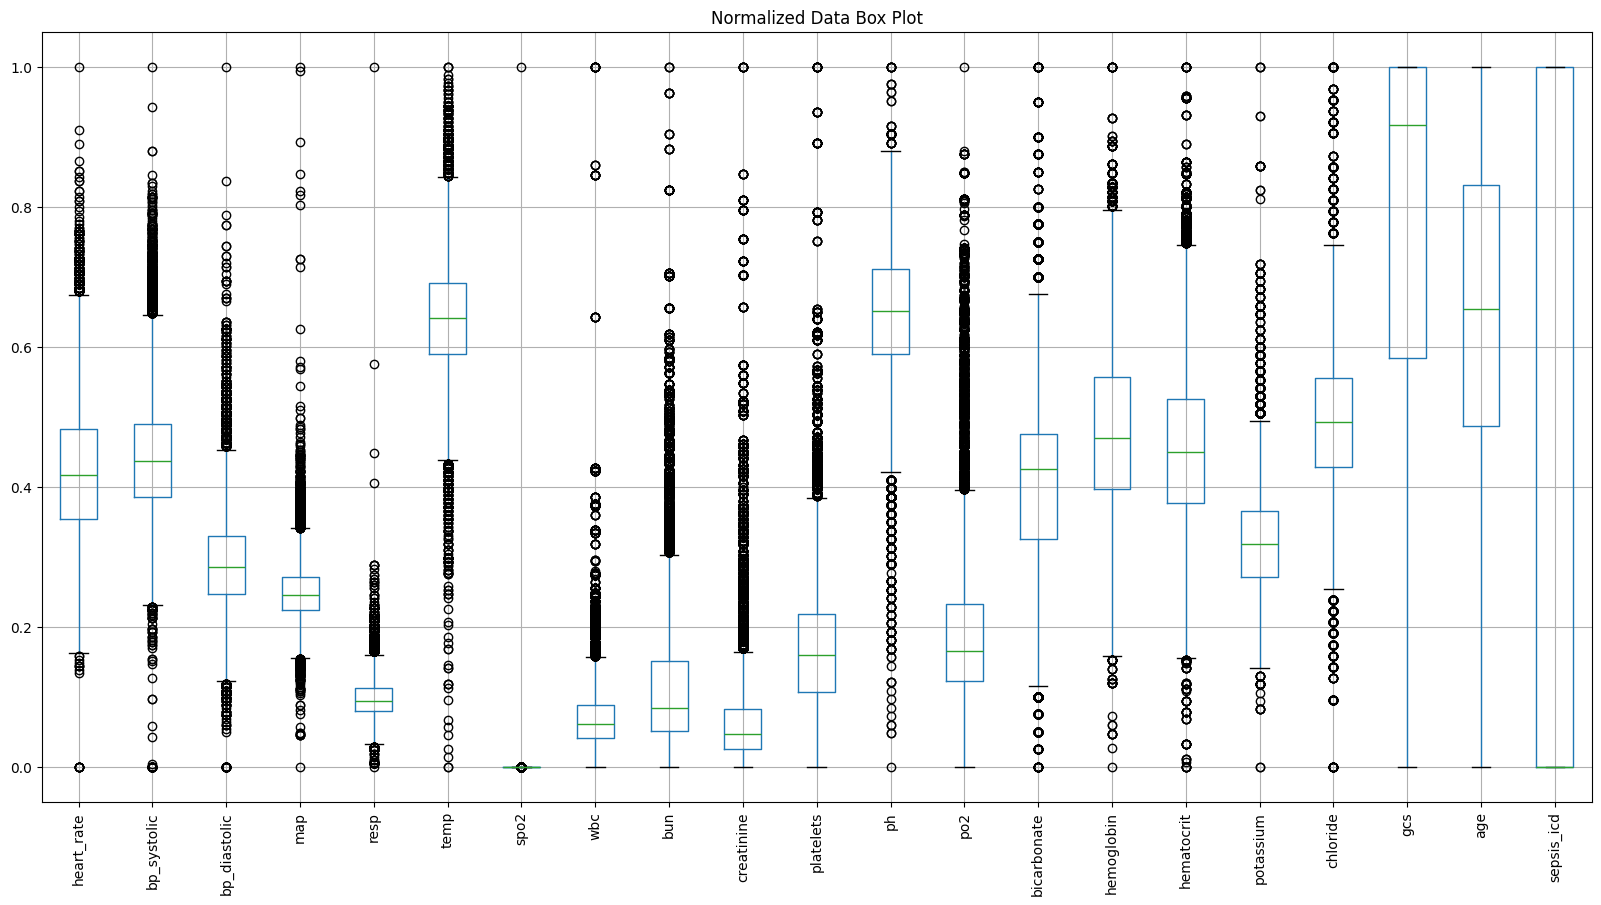

In [94]:
# df box plot
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Normalizasyon uygulanacak sütunlar (patient_id hariç tüm sütunlar)
columns_to_normalize = df.drop(columns=['patient_id']).columns

# Min-Max scaler oluştur
scaler = MinMaxScaler()

# Belirtilen sütunlarda 0-1 normalizasyonu uygula
df_normalized = pd.DataFrame(scaler.fit_transform(df[columns_to_normalize]), columns=columns_to_normalize)

# Boxplot çizimi
plt.figure(figsize=(20, 10))
df_normalized.boxplot(rot=90)
plt.title('Normalized Data Box Plot')
plt.show()


In [95]:
def graph_for_sepsis(column):
    palette = sns.color_palette('husl', len(df['sepsis_icd'].unique()))
    sepsis_icd_to_color = {sepsis_icd: palette[i] for i, sepsis_icd in enumerate(df['sepsis_icd'].unique())}
    plt.figure(figsize=(10, 6))
    for patient_id in df['patient_id'].unique():
        patient_data = df[df['patient_id'] == patient_id]
        
        color = sepsis_icd_to_color[patient_data['sepsis_icd'].iloc[0]]
        
        plt.plot(range(len(patient_data)), patient_data[column], label=f'Patient {patient_id}', color=color)

    plt.xlabel('Time (0-23)')
    plt.ylabel(column)
    plt.title(column +' Data for Each Patient')
    handles = [plt.Line2D([0], [0], color=sepsis_icd_to_color[icd], lw=2) for icd in sepsis_icd_to_color]
    sepsis_labels = {0: 'No Sepsis', 1: 'Sepsis'}
    labels = [sepsis_labels[icd] for icd in sepsis_icd_to_color]
    plt.legend(handles=handles, labels=labels, title='Sepsis ICD', loc='upper right')
    plt.show()

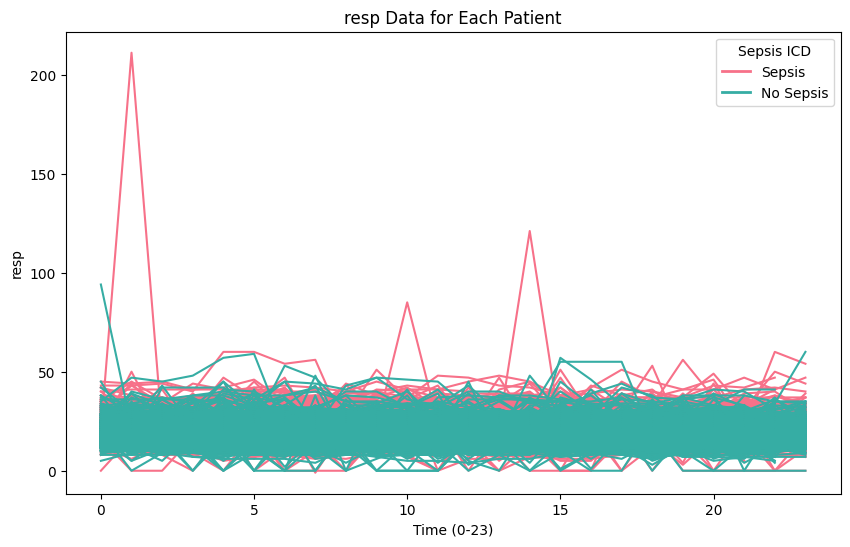

In [96]:
graph_for_sepsis('resp')

https://www.healthline.com/health/normal-respiratory-rate#normal-rate-in-adults

| Age                 | Rate (in breaths per minute) |
|---------------------|------------------------------|
| Birth to 6 months   | 30 to 60                    |
| 6 months to 1 year  | 30 to 50                    |
| 1 to 3 years        | 24 to 40                    |
| 3 to 5 years        | 22 to 34                    |
| 5 to 12 years       | 16 to 30                    |
| 12 to 18 years      | 12 to 20                    |


In [97]:
df[df.resp>60][['resp', 'patient_id', 'age']]

resp  patient_id    age
1190   121.0        1651  63.79
2761   211.0         661  41.62
6274    85.0        7771  51.49
29040   94.0        2980  80.67

In [98]:
df.loc[df.resp > 60, 'resp'] = np.nan

In [99]:
df.resp = imputer.fit_transform(df[['resp']])

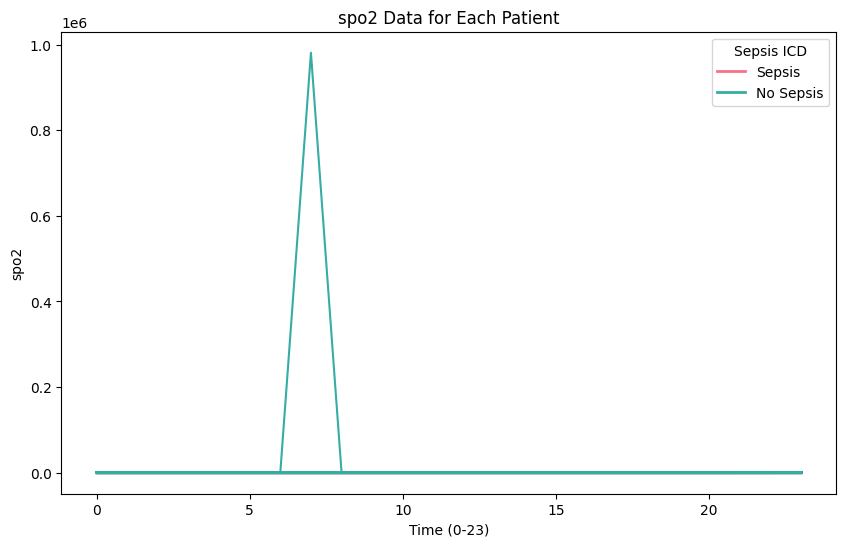

In [100]:
graph_for_sepsis('spo2')

In [101]:
df.spo2.describe()

count     35101.000000
mean        125.673366
std        5235.720618
min           0.000000
25%          96.000000
50%          98.000000
75%         100.000000
max      981023.000000
Name: spo2, dtype: float64

In [102]:
df[df.spo2 == 981023.000000]

heart_rate  bp_systolic  bp_diastolic   map  resp       temp      spo2  \
32432        71.0        120.0          77.0  87.0  18.0  36.722222  981023.0   

       wbc   bun  creatinine  ...   po2  bicarbonate  hemoglobin  hematocrit  \
32432  8.3  10.0         0.7  ...  60.0         27.0        10.2        30.2   

       potassium  chloride   gcs    age  sepsis_icd  patient_id  
32432        3.8     100.0  15.0  52.43         0.0        4430  

[1 rows x 22 columns]

https://www.healthline.com/health/normal-blood-oxygen-level#results

| Measurement               | Healthy Level  | When to Get Medical Help   |
|---------------------------|----------------|-----------------------------|
| Arterial blood gas (ABG)  | 75–100 mm Hg   | less than 74 mm Hg         |
| Pulse oximeter            | 95–100%        | less than 95%              |

In [103]:
df.loc[df.spo2 == 981023.000000, 'spo2'] = 98.1023

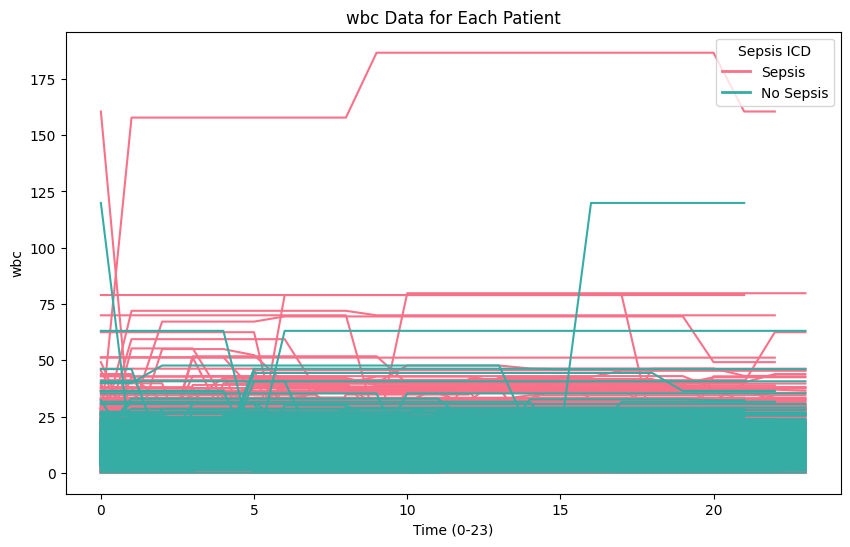

In [104]:
graph_for_sepsis('wbc')

The normal number of WBCs in the blood is 4,500 to 11,000 WBCs per microliter (4.5 to 11.0 × 109/L).

https://www.ucsfhealth.org/medical-tests/wbc-count

In [105]:
df.wbc.describe()

count    35101.000000
mean        13.273884
std          9.394320
min          0.100000
25%          7.900000
50%         11.600000
75%         16.500000
max        186.600000
Name: wbc, dtype: float64

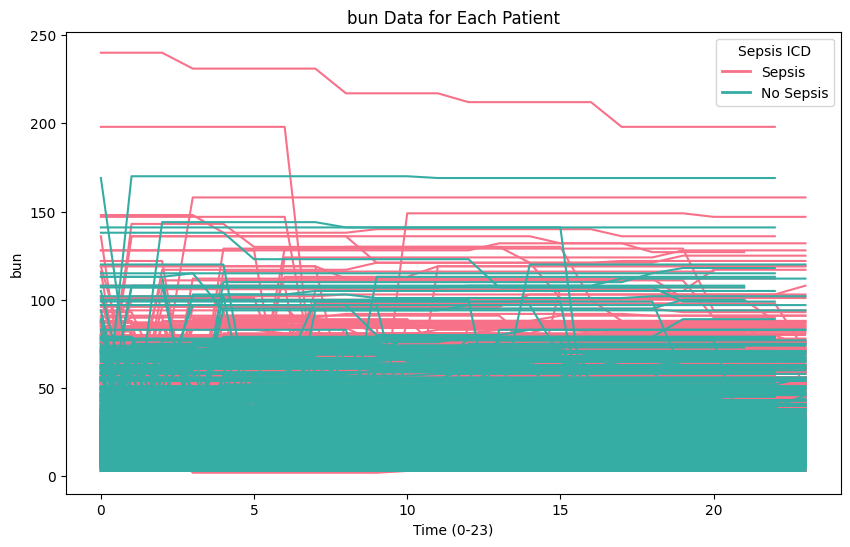

In [106]:
graph_for_sepsis('bun')

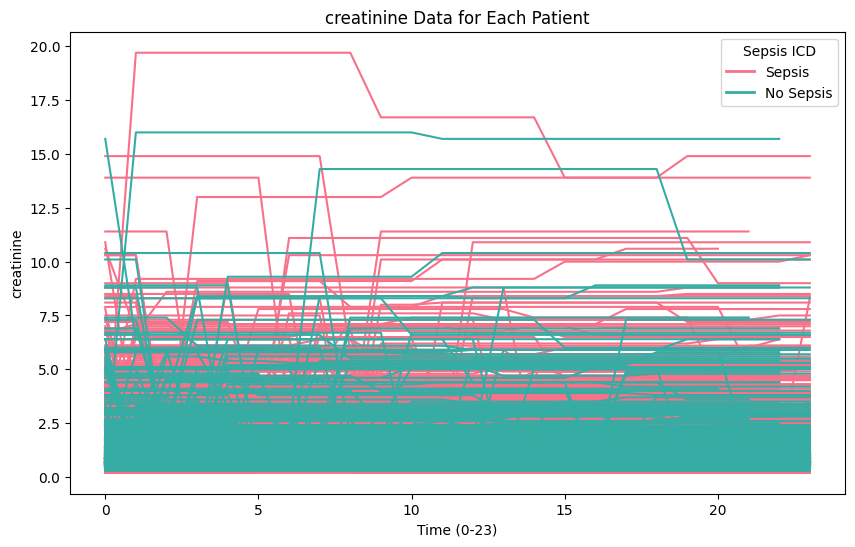

In [107]:
graph_for_sepsis('creatinine')

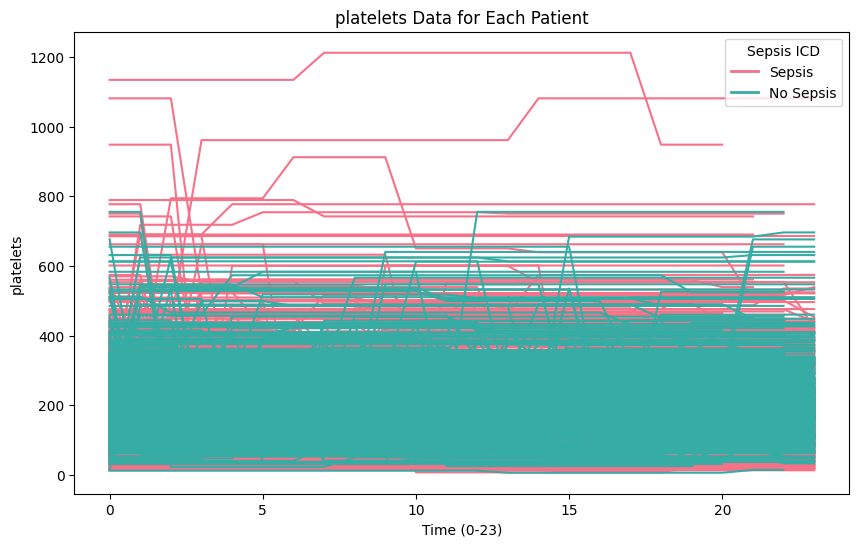

In [108]:
graph_for_sepsis('platelets')

A normal platelet count ranges from 150,000 to 450,000 platelets per microliter of blood. Having more than 450,000 platelets is a condition called thrombocytosis; having less than 150,000 is known as thrombocytopenia.
https://www.hopkinsmedicine.org/health/conditions-and-diseases/what-are-platelets-and-why-are-they-important#:~:text=What%20is%20a%20healthy%20platelet,150%2C000%20is%20known%20as%20thrombocytopenia.

In [109]:
df.shape

(35101, 22)

4 columns and 899 rows are deleted.

In [110]:
df.describe()

heart_rate   bp_systolic  bp_diastolic           map          resp  \
count  35101.000000  35101.000000  35101.000000  35101.000000  35101.000000   
mean      88.125125    115.000642     58.997580     75.474048     19.970600   
std       19.135269     21.794744     14.142642     15.241214      5.941433   
min        0.000000      0.000000      0.000000    -17.000000     -1.000000   
25%       74.000000    100.000000     50.000000     66.000000     16.000000   
50%       87.000000    113.000000     58.000000     74.000000     19.000000   
75%      101.000000    127.000000     67.000000     83.333298     23.000000   
max      209.000000    259.000000    203.000000    354.000000     60.000000   

               temp          spo2           wbc           bun    creatinine  \
count  35101.000000  35101.000000  35101.000000  35101.000000  35101.000000   
mean      36.890296     97.727583     13.273884     30.142264      1.651936   
std        0.837668      5.999261      9.394320     24.011962      1.677005   
min       30.555556      0.000000      0.100000      2.000000      0.200000   
25%       36.388889     96.000000      7.900000     14.000000      0.700000   
50%       36.888890     98.000000     11.600000     22.000000      1.100000   
75%       37.388889    100.000000     16.500000     38.000000      1.800000   
max       40.444446    125.673366    186.600000    240.000000     19.700000   

       ...           po2   bicarbonate    hemoglobin    hematocrit  \
count  ...  35101.000000  35101.000000  35101.000000  35101.000000   
mean   ...    121.862369     22.512128     10.466343     31.188413   
std    ...     71.917343      4.797487      1.796608      5.100335   
min    ...      0.000000      6.000000      3.200000     11.800000   
25%    ...     78.000000     19.000000      9.200000     27.800000   
50%    ...    105.000000     23.000000     10.300000     30.900000   
75%    ...    147.000000     25.000000     11.600000     34.100000   
max    ...    633.000000     46.000000     18.300000     54.300000   

          potassium      chloride           gcs           age    sepsis_icd  \
count  35101.000000  35101.000000  35101.000000  35101.000000  35101.000000   
mean       4.132726    106.117518     11.936461     65.244995      0.499530   
std        0.637532      6.420871      3.763600     17.197759      0.500007   
min        1.400000     75.000000      3.000000     18.680000      0.000000   
25%        3.700000    102.000000     10.000000     54.110000      0.000000   
50%        4.100000    106.000000     14.000000     66.220000      0.000000   
75%        4.500000    110.000000     15.000000     79.080000      1.000000   
max        9.900000    138.000000     15.000000     91.400000      1.000000   

         patient_id  
count  35101.000000  
mean    4960.779009  
std     2913.285041  
min       10.000000  
25%     2400.000000  
50%     4991.000000  
75%     7481.000000  
max    10001.000000  

[8 rows x 22 columns]

In [111]:
y = df['sepsis_icd']
X = df.drop(columns=['sepsis_icd'])

In [112]:
def graph_for_sepsis_vs_col(col):
    palette = sns.color_palette('husl', len(y.unique()))
    sepsis_icd_to_color = {sepsis_icd: palette[i] for i, sepsis_icd in enumerate(y.unique())}
    plt.figure(figsize=(10, 6))
    for patient_id in X['patient_id'].unique():
        patient_data = X[X['patient_id'] == patient_id]
        
        color = sepsis_icd_to_color[y.loc[patient_data.index].iloc[0]]
        
        plt.plot(range(len(patient_data)), patient_data[col], label=f'Patient {patient_id}', color=color)

    plt.xlabel('Time (0-23)')
    plt.ylabel(col)
    plt.title(col + ' Data for Each Patient')
    # Set y-axis limits to values between 0 and 16

    # Define legend handles
    handles = [plt.Line2D([0], [0], color=sepsis_icd_to_color[icd], lw=2) for icd in sepsis_icd_to_color]
    sepsis_labels = {0: 'No Sepsis', 1: 'Sepsis'}
    labels = [sepsis_labels[icd] for icd in sepsis_icd_to_color]
    plt.legend(handles=handles, labels=labels, title='Sepsis ICD', loc='upper right')

In [113]:
df.columns

Index(['heart_rate', 'bp_systolic', 'bp_diastolic', 'map', 'resp', 'temp',
       'spo2', 'wbc', 'bun', 'creatinine', 'platelets', 'ph', 'po2',
       'bicarbonate', 'hemoglobin', 'hematocrit', 'potassium', 'chloride',
       'gcs', 'age', 'sepsis_icd', 'patient_id'],
      dtype='object')

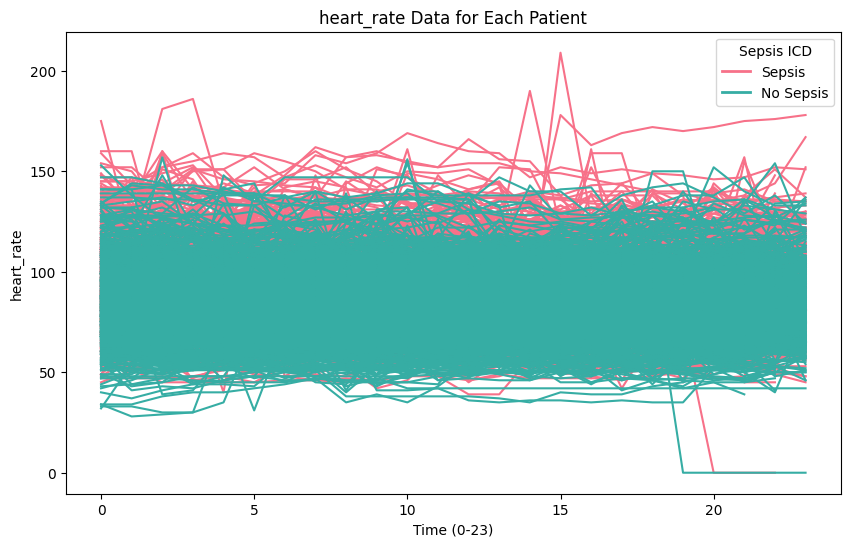

In [114]:
graph_for_sepsis_vs_col('heart_rate')
plt.show()

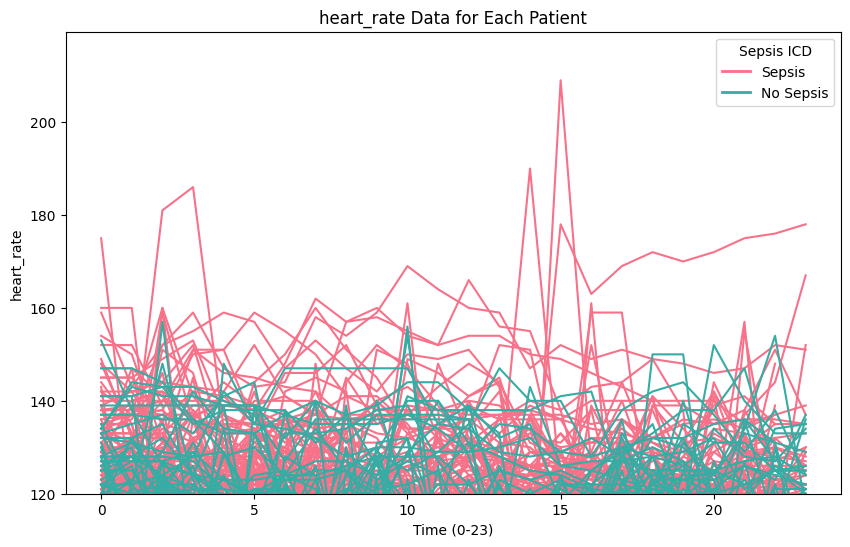

In [115]:
graph_for_sepsis_vs_col('heart_rate')
plt.ylim(bottom=120)
plt.show()

In [116]:
df[df['heart_rate'] >= 120].drop_duplicates('patient_id')['sepsis_icd'].value_counts()

sepsis_icd
1.0    228
0.0    107
Name: count, dtype: int64

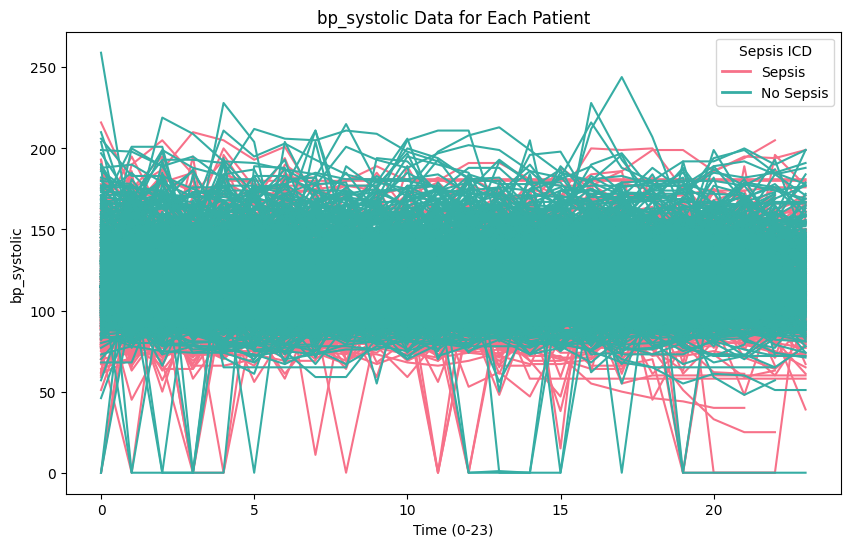

In [117]:
graph_for_sepsis_vs_col('bp_systolic')
plt.show()

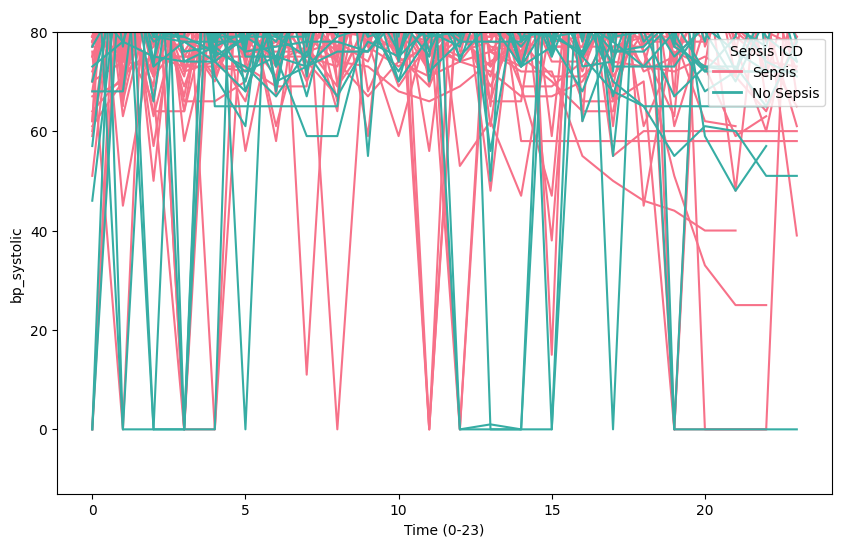

In [118]:
graph_for_sepsis_vs_col('bp_systolic')
plt.ylim(top=80)
plt.show()

In [119]:
df[df['bp_systolic'] < 80].drop_duplicates('patient_id')['sepsis_icd'].value_counts()

sepsis_icd
1.0    218
0.0    101
Name: count, dtype: int64

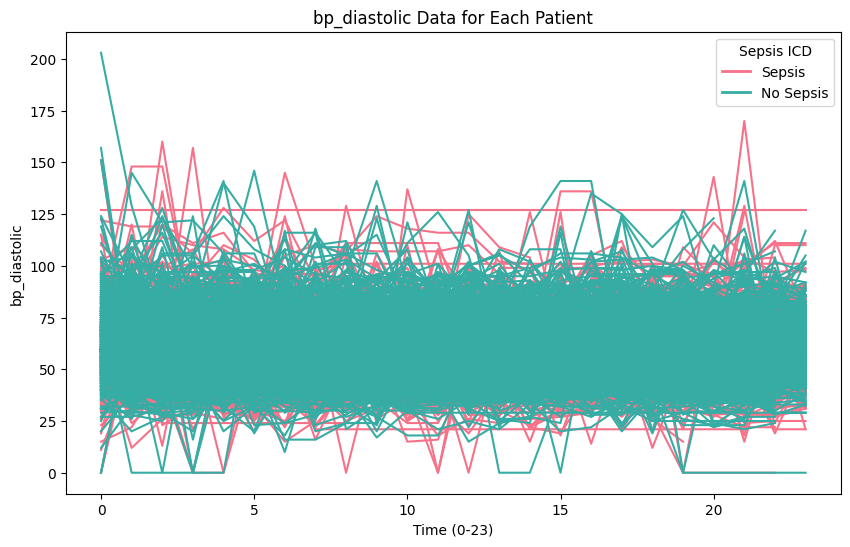

In [120]:
graph_for_sepsis_vs_col('bp_diastolic')
plt.show()

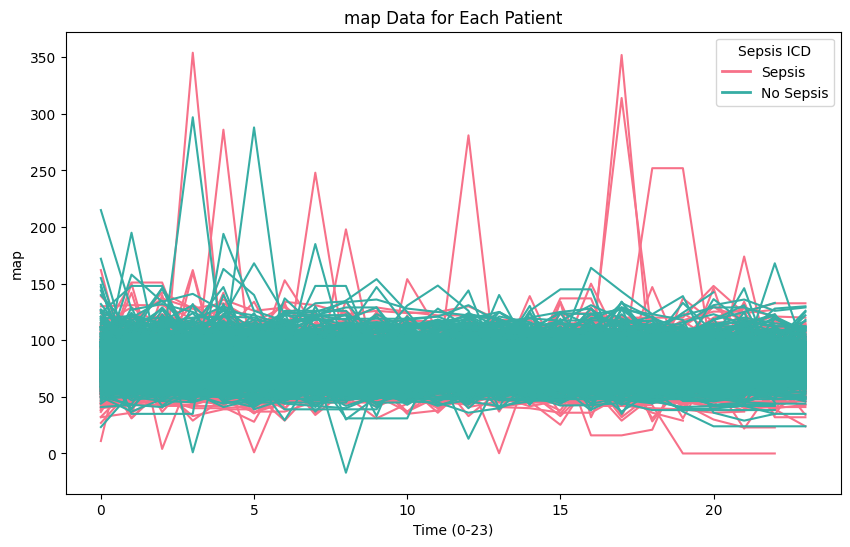

In [121]:
graph_for_sepsis_vs_col('map')
plt.show()

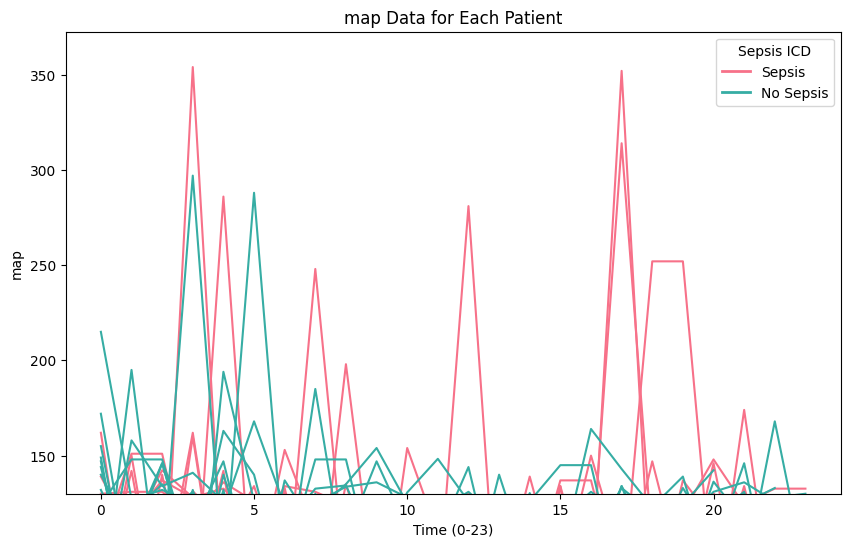

In [122]:
graph_for_sepsis_vs_col('map')
plt.ylim(bottom=130)
plt.show()

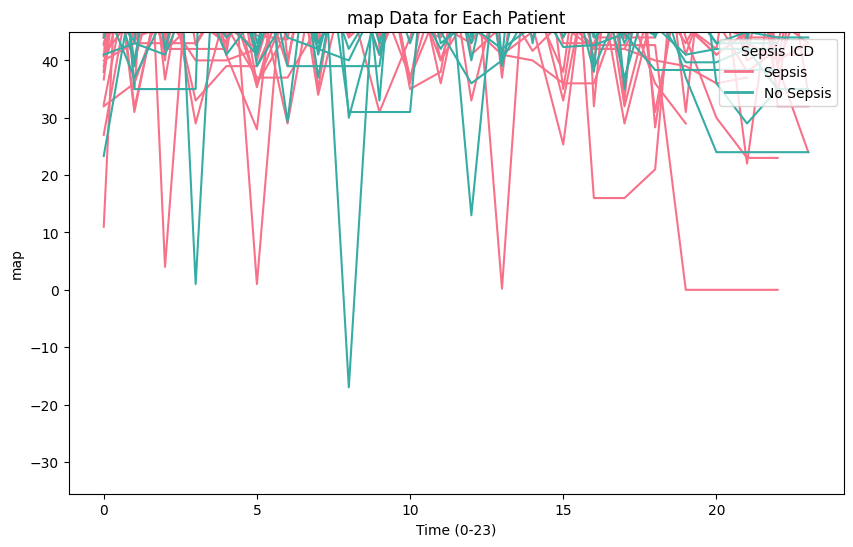

In [123]:
graph_for_sepsis_vs_col('map')
plt.ylim(top=45)
plt.show()

In [124]:
df[df['map'] > 130].drop_duplicates('patient_id')['sepsis_icd'].value_counts()

sepsis_icd
0.0    39
1.0    33
Name: count, dtype: int64

In [125]:
df[df['map'] < 45].drop_duplicates('patient_id')['sepsis_icd'].value_counts()

sepsis_icd
1.0    95
0.0    51
Name: count, dtype: int64

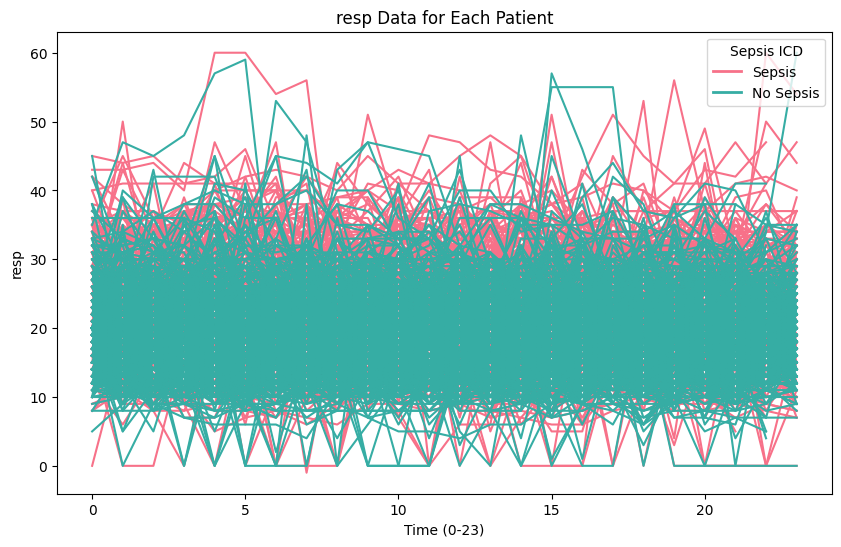

In [126]:
graph_for_sepsis_vs_col('resp')
plt.show()

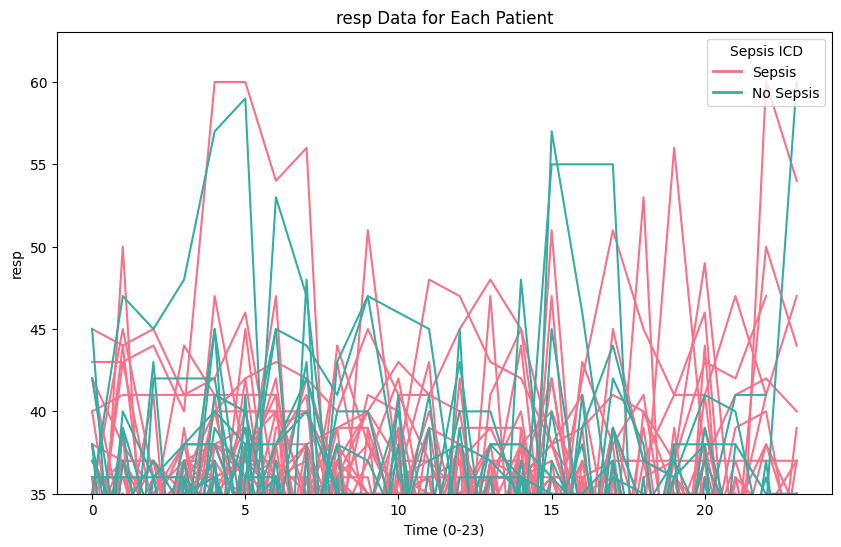

In [127]:
graph_for_sepsis_vs_col('resp')
plt.ylim(bottom=35)
plt.show()

In [128]:
df[df['resp'] > 35].drop_duplicates('patient_id')['sepsis_icd'].value_counts()

sepsis_icd
1.0    117
0.0     56
Name: count, dtype: int64

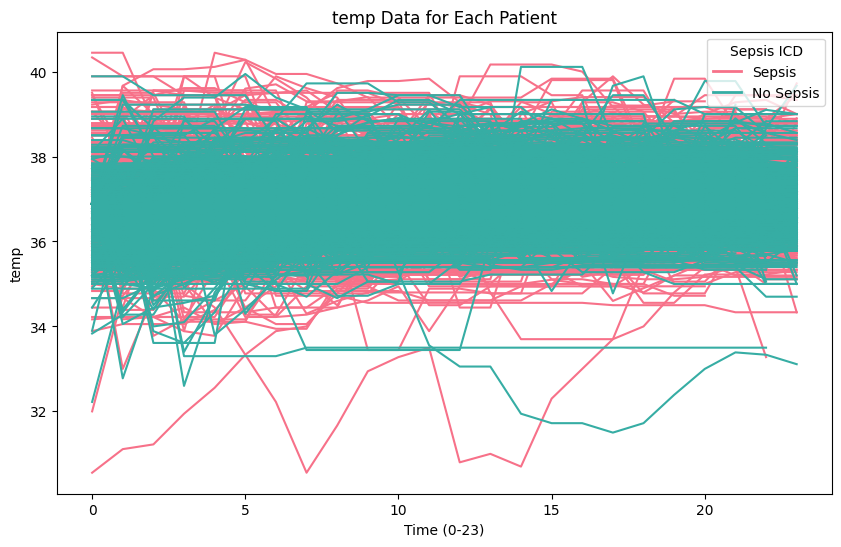

In [129]:
graph_for_sepsis_vs_col('temp')
plt.show()

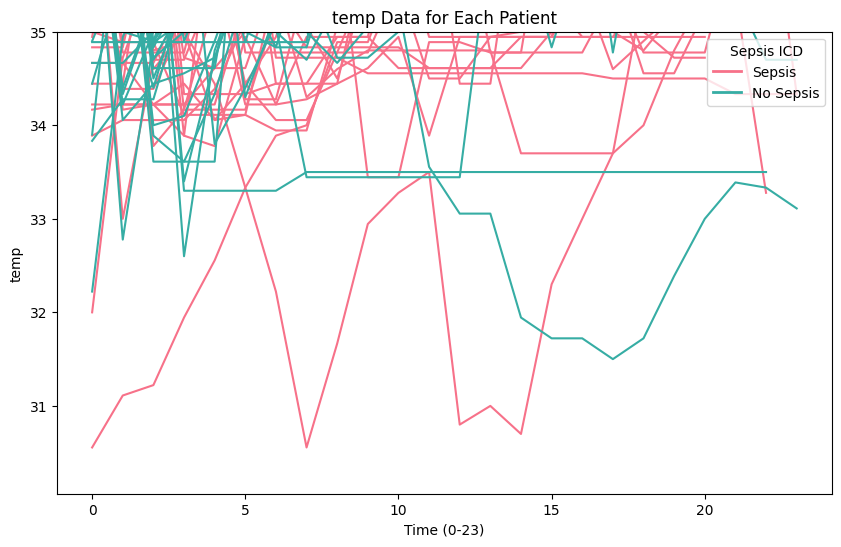

In [130]:
graph_for_sepsis_vs_col('temp')
plt.ylim(top=35)
plt.show()

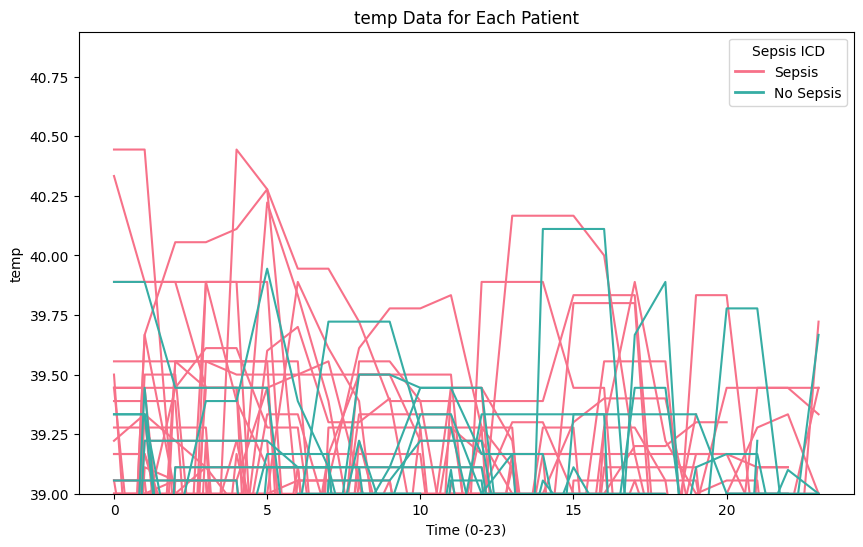

In [131]:
graph_for_sepsis_vs_col('temp')
plt.ylim(bottom=39)
plt.show()

In [152]:
df[df['temp'] < 35].drop_duplicates('patient_id')['sepsis_icd'].value_counts()

sepsis_icd
1.0    41
0.0    37
Name: count, dtype: int64

In [133]:
df[df['temp'] > 39].drop_duplicates('patient_id')['sepsis_icd'].value_counts()

sepsis_icd
1.0    73
0.0    26
Name: count, dtype: int64

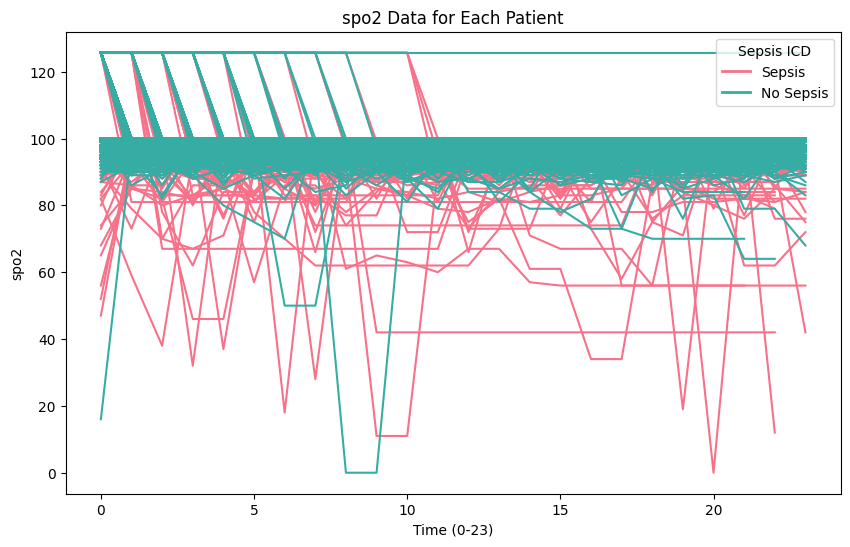

In [134]:
graph_for_sepsis_vs_col('spo2')
plt.show()

In [153]:
df[df['spo2'] > 100].drop_duplicates('patient_id')['sepsis_icd'].value_counts()

sepsis_icd
0.0    237
1.0    235
Name: count, dtype: int64

In [155]:
df[df['spo2'] < 90].drop_duplicates('patient_id')['sepsis_icd'].value_counts()

sepsis_icd
1.0    148
0.0     77
Name: count, dtype: int64

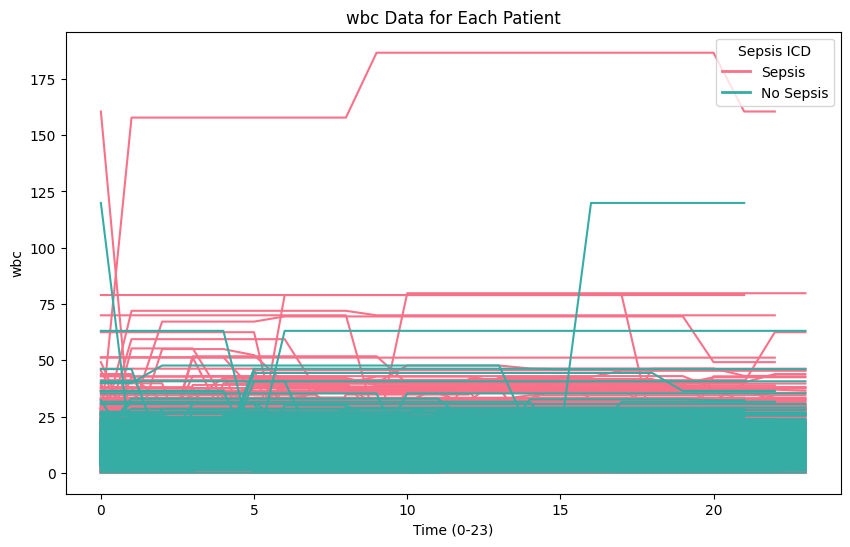

In [135]:
graph_for_sepsis_vs_col('wbc')
plt.show()

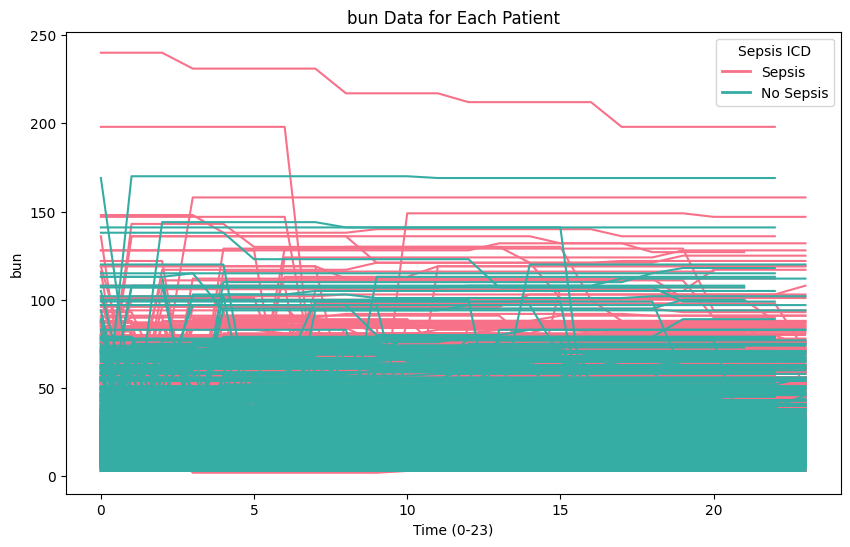

In [136]:
graph_for_sepsis_vs_col('bun')
plt.show()

In [158]:
df[df['bun'] > 70].drop_duplicates('patient_id')['sepsis_icd'].value_counts()

sepsis_icd
1.0    142
0.0     65
Name: count, dtype: int64

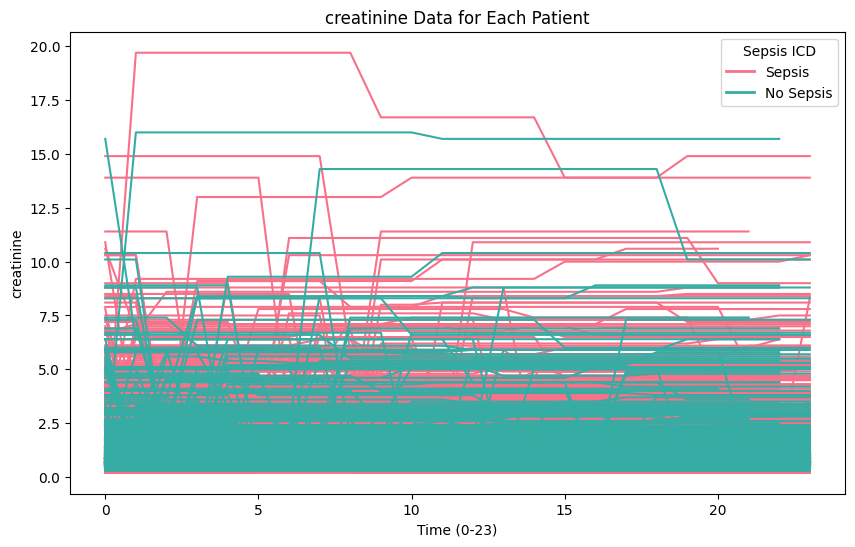

In [137]:
graph_for_sepsis_vs_col('creatinine')
plt.show()

In [162]:
df[df['creatinine'] > 4].drop_duplicates('patient_id')['sepsis_icd'].value_counts()

sepsis_icd
1.0    147
0.0     74
Name: count, dtype: int64

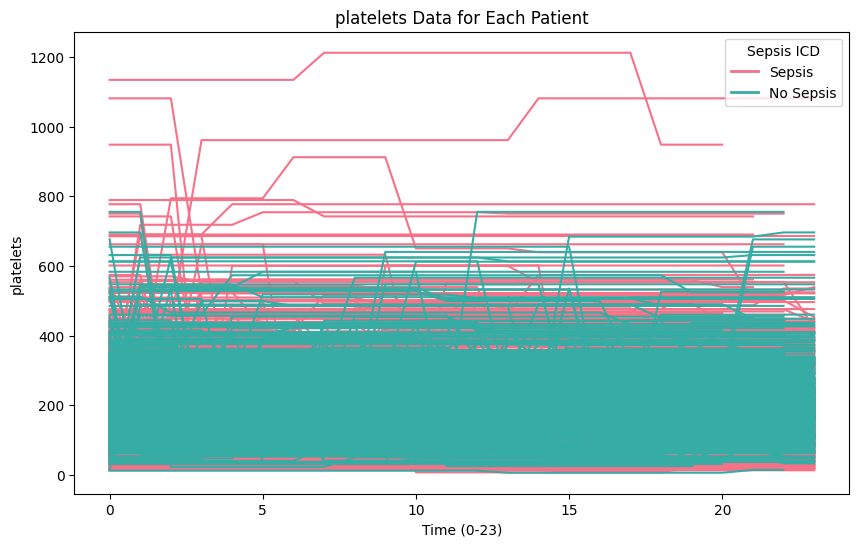

In [138]:
graph_for_sepsis_vs_col('platelets')
plt.show()

In [164]:
df[df['platelets'] > 400].drop_duplicates('patient_id')['sepsis_icd'].value_counts()

sepsis_icd
1.0    48
0.0    35
Name: count, dtype: int64

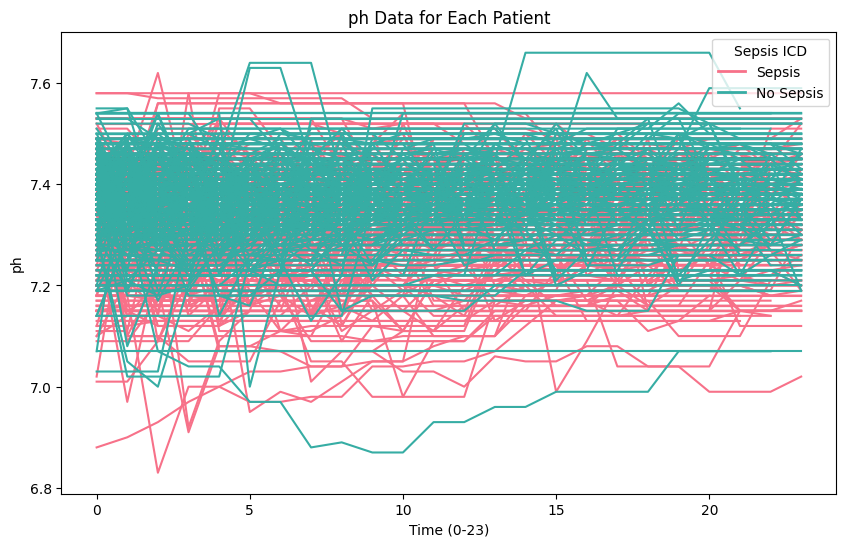

In [139]:
graph_for_sepsis_vs_col('ph')
plt.show()

In [165]:
df[df['ph'] < 7.2].drop_duplicates('patient_id')['sepsis_icd'].value_counts()

sepsis_icd
1.0    111
0.0     30
Name: count, dtype: int64

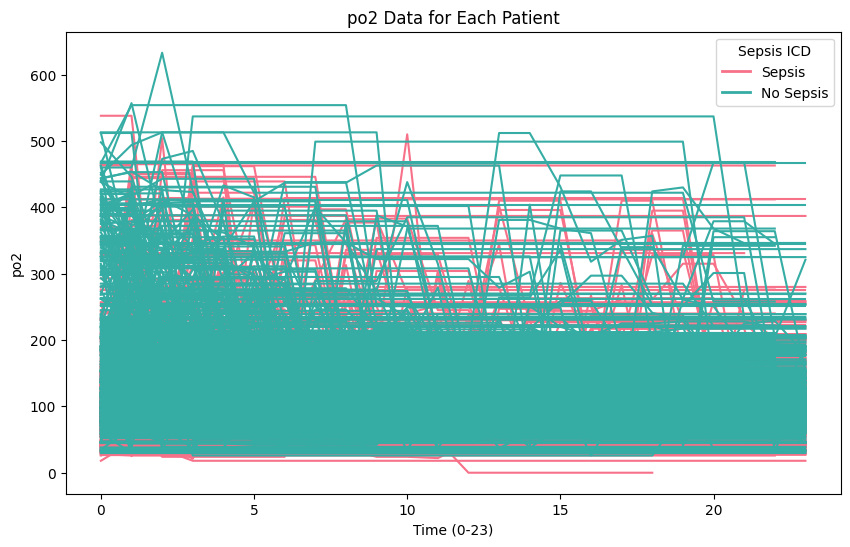

In [140]:
graph_for_sepsis_vs_col('po2')
plt.show()

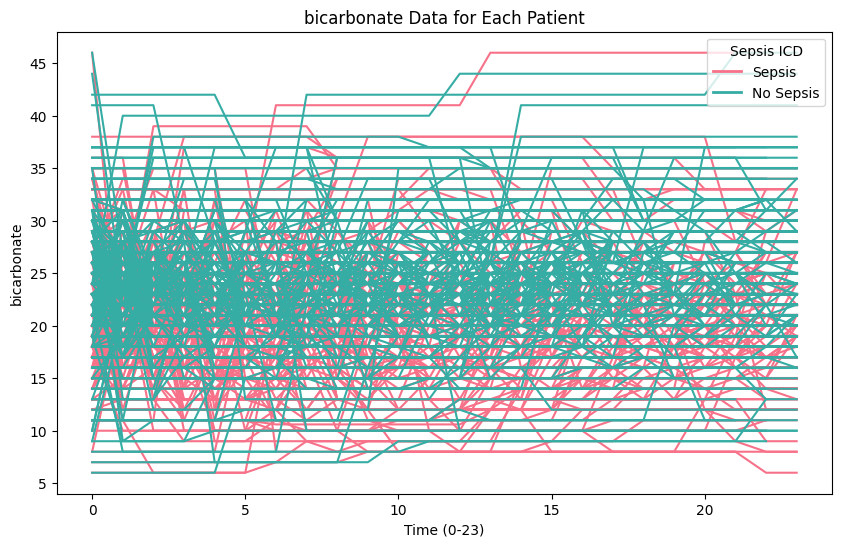

In [141]:
graph_for_sepsis_vs_col('bicarbonate')
plt.show()

In [166]:
df[df['bicarbonate'] < 20].drop_duplicates('patient_id')['sepsis_icd'].value_counts()

sepsis_icd
1.0    468
0.0    174
Name: count, dtype: int64

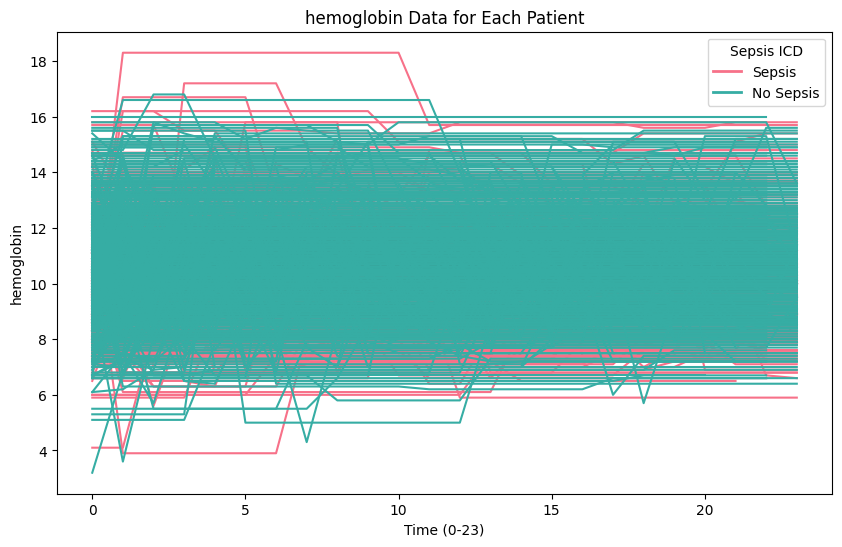

In [142]:
graph_for_sepsis_vs_col('hemoglobin')
plt.show()

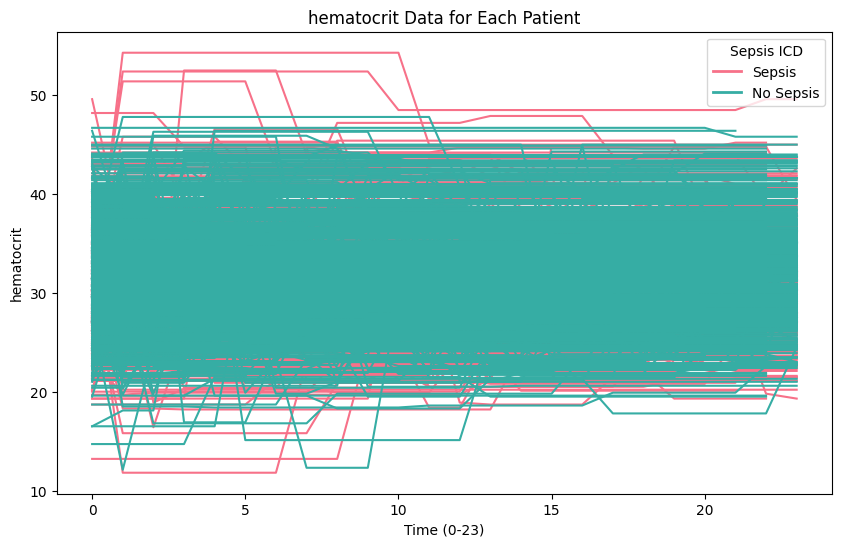

In [143]:
graph_for_sepsis_vs_col('hematocrit')
plt.show()

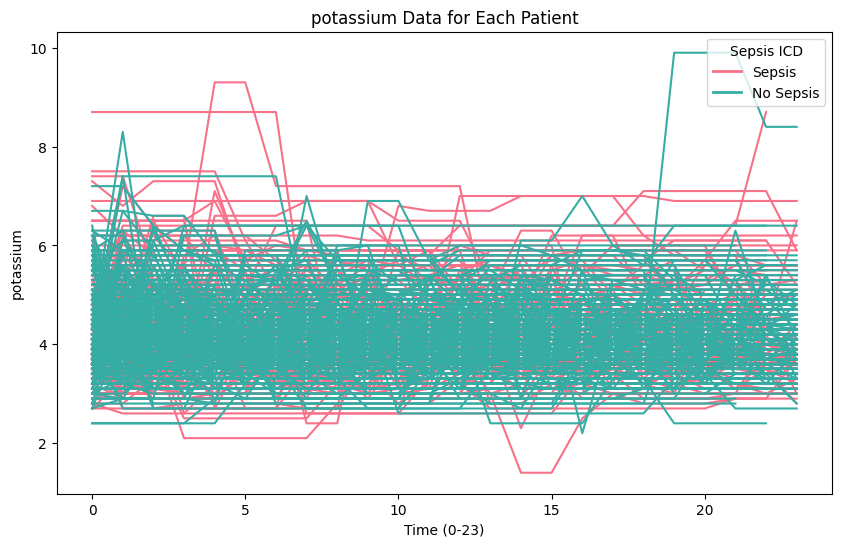

In [144]:
graph_for_sepsis_vs_col('potassium')
plt.show()

In [168]:
df[df['potassium'] > 6].drop_duplicates('patient_id')['sepsis_icd'].value_counts()

sepsis_icd
1.0    33
0.0    28
Name: count, dtype: int64

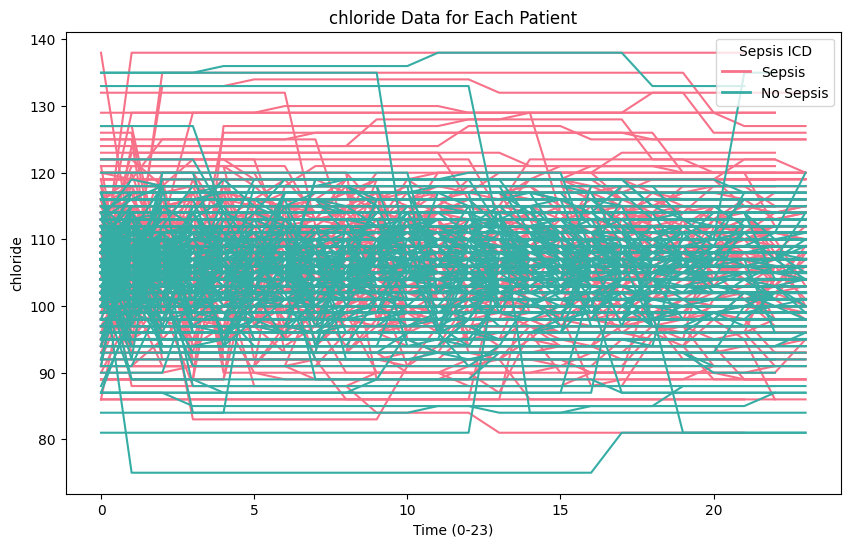

In [145]:
graph_for_sepsis_vs_col('chloride')
plt.show()

In [169]:
df[df['chloride'] > 120].drop_duplicates('patient_id')['sepsis_icd'].value_counts()

sepsis_icd
1.0    31
0.0     6
Name: count, dtype: int64

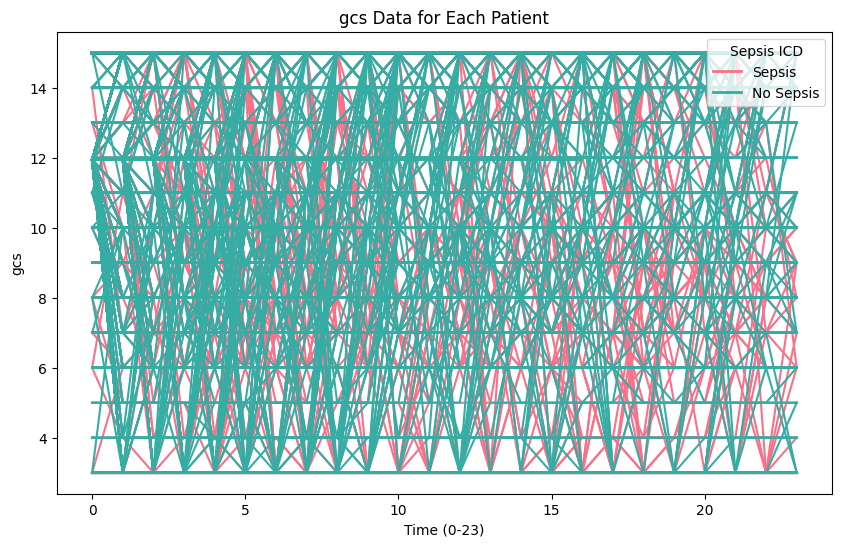

In [146]:
graph_for_sepsis_vs_col('gcs')
plt.show()

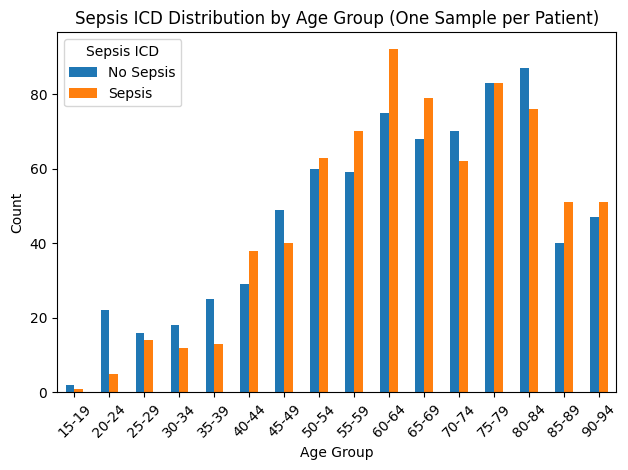

In [147]:
unique_patients = df.drop_duplicates(subset=['patient_id'])

bins = range(15, 96, 5)
labels = [f"{i}-{i+4}" for i in bins[:-1]] 

unique_patients = unique_patients.copy()  # Ensure you're working with a copy
unique_patients.loc[:, 'age_group'] = pd.cut(unique_patients['age'], bins=bins, labels=labels, right=False)

grouped = unique_patients.groupby(['age_group', 'sepsis_icd'], observed=False).size().unstack(fill_value=0)
grouped.plot(kind='bar', stacked=False)
plt.title('Sepsis ICD Distribution by Age Group (One Sample per Patient)')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sepsis ICD', labels=['No Sepsis', 'Sepsis'])
plt.tight_layout()
plt.show()

In [ ]:
df = df.drop(columns=['bp_diastolic',
                      'po2',
                      'hemoglobin',
                      'hematocrit',
                      'potassium',
                      'gcs',
                      'age'])

In [171]:
df.head()

heart_rate  bp_systolic   map  resp       temp   spo2   wbc   bun  \
0        81.0         91.0  57.0  20.0  36.890296   97.0  12.3  59.0   
1        80.0         87.0  58.0  21.0  36.890296  100.0  12.3  59.0   
2        80.0         80.0  48.0  16.0  36.666667   99.0  12.3  59.0   
3        80.0         81.0  45.0  17.0  36.666667   96.0  12.3  59.0   
4        80.0         86.0  49.0  17.0  36.666667   97.0  12.3  59.0   

   creatinine  platelets    ph  bicarbonate  chloride  sepsis_icd  patient_id  
0         2.4      142.0  7.38         19.0     109.0         1.0         951  
1         2.4      142.0  7.38         19.0     109.0         1.0         951  
2         2.4      142.0  7.38         19.0     109.0         1.0         951  
3         2.4      142.0  7.38         19.0     109.0         1.0         951  
4         2.4      142.0  7.38         19.0     109.0         1.0         951

In [172]:
df.to_csv('anfis_cleaned.csv', index=False)